In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
# set the graphs to show in the jupyter notebook
%matplotlib inline

import plotly.express as px

In [2]:
%cd "C:/Users/1234s/Desktop/python project for resume/3/5. Python Foundation End to End Case Study_E-Commerce Analytics Project"

C:\Users\1234s\Desktop\python project for resume\3\5. Python Foundation End to End Case Study_E-Commerce Analytics Project


In [3]:
#importing the data
customers= pd.read_csv('CUSTOMERS.csv')
sellers= pd.read_csv('SELLERS.csv')
products= pd.read_csv('PRODUCTS.csv')
orders= pd.read_csv('ORDERS.csv')
order_items= pd.read_csv('ORDER_ITEMS.csv')
order_payments= pd.read_csv('ORDER_PAYMENTS.csv')
order_review=pd.read_csv('ORDER_REVIEW_RATINGS.csv')
geo_location=pd.read_csv('GEO_LOCATION.csv')

In [4]:
data = pd.merge(order_payments, orders, on='order_id')

In [5]:
data = pd.merge(order_review, data, on='order_id')

In [6]:
data = pd.merge(left = data, right = order_items, how = 'left', on = 'order_id')

In [7]:
data = pd.merge(right = sellers, left = data, how = 'left', on = 'seller_id')

In [8]:
data = pd.merge(right = products, left = data, how = 'left', on = 'product_id')

In [9]:
data = pd.merge(right = customers, left = data, how = 'left', on = 'customer_id')

In [10]:
data.nunique()

review_id                        99172
order_id                         99440
review_score                         5
review_creation_date               636
review_answer_timestamp          89499
payment_sequential                  29
payment_type                         5
payment_installments                24
payment_value                    29077
customer_id                      99440
order_status                         8
order_purchase_timestamp         88788
order_approved_at                50461
order_delivered_carrier_date     61543
order_delivered_customer_date    75648
order_estimated_delivery_date      458
order_item_id                       21
product_id                       32951
seller_id                         3095
shipping_limit_date              54614
price                             5968
freight_value                     6999
seller_zip_code_prefix            2225
seller_city                        534
seller_state                        19
product_category_name    

In [11]:
#### deleting irrelevant columns from data table
data.drop(columns=[ 'product_name_lenght','product_description_lenght','product_photos_qty', 'product_weight_g',
        'product_length_cm', 'product_height_cm', 'product_width_cm','seller_zip_code_prefix','order_approved_at',
        'order_delivered_carrier_date','order_estimated_delivery_date','order_delivered_customer_date','shipping_limit_date'
        ,'payment_sequential','review_creation_date','review_answer_timestamp' ,'payment_installments'], inplace=True)

In [12]:
data.columns

Index(['review_id', 'order_id', 'review_score', 'payment_type',
       'payment_value', 'customer_id', 'order_status',
       'order_purchase_timestamp', 'order_item_id', 'product_id', 'seller_id',
       'price', 'freight_value', 'seller_city', 'seller_state',
       'product_category_name', 'customer_unique_id',
       'customer_zip_code_prefix', 'customer_city', 'customer_state'],
      dtype='object')

In [13]:
#checking and dropping duplicat columns
data.duplicated().sum()

711

In [14]:
data.drop_duplicates(inplace=True)

In [15]:
#converting into proper date and time format
data.order_purchase_timestamp=pd.to_datetime(data.order_purchase_timestamp)

In [16]:
data.dtypes 

review_id                           object
order_id                            object
review_score                         int64
payment_type                        object
payment_value                      float64
customer_id                         object
order_status                        object
order_purchase_timestamp    datetime64[ns]
order_item_id                      float64
product_id                          object
seller_id                           object
price                              float64
freight_value                      float64
seller_city                         object
seller_state                        object
product_category_name               object
customer_unique_id                  object
customer_zip_code_prefix             int64
customer_city                       object
customer_state                      object
dtype: object

In [17]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 118437 entries, 0 to 119147
Data columns (total 20 columns):
 #   Column                    Non-Null Count   Dtype         
---  ------                    --------------   -----         
 0   review_id                 118437 non-null  object        
 1   order_id                  118437 non-null  object        
 2   review_score              118437 non-null  int64         
 3   payment_type              118437 non-null  object        
 4   payment_value             118437 non-null  float64       
 5   customer_id               118437 non-null  object        
 6   order_status              118437 non-null  object        
 7   order_purchase_timestamp  118437 non-null  datetime64[ns]
 8   order_item_id             117623 non-null  float64       
 9   product_id                117623 non-null  object        
 10  seller_id                 117623 non-null  object        
 11  price                     117623 non-null  float64       
 12  fr

#### 1. Perform Detailed exploratory analysis

##### a. Define & calculate high level metrics like (Total Revenue, Total quantity, Total products, Total categories, Total sellers, Total locations, Total channels, Total payment methods etc…)

In [18]:
print("Total Revenue =",data.payment_value.sum())
print("Total Quantity =",data.order_item_id.count())
print("Total products are",data.product_id.nunique())
print("Total product categories are",data.product_category_name.nunique())
print("Total number of sellers are",data.seller_id.nunique())
print("Total locations =",data.customer_zip_code_prefix.nunique())
print("Total channels and payment methods are",data.payment_type.nunique())

Total Revenue = 20557766.619999997
Total Quantity = 117623
Total products are 32951
Total product categories are 71
Total number of sellers are 3095
Total locations = 14994
Total channels and payment methods are 5


##### b. Understanding how many new customers acquired every month.

In [19]:
# adding Month column yearwise
data['month_of_year']=data['order_purchase_timestamp'].apply(lambda x : pd.Timestamp.strftime(x,format='%Y%m'))
new_customer_monthly=data.drop_duplicates(subset = ['customer_unique_id'],keep = 'first').groupby(by='month_of_year')['customer_unique_id'].nunique().reset_index()
new_customer_monthly

,month_of_year,customer_unique_id
0,201609,3
1,201610,316
2,201612,1
3,201701,752
4,201702,1720
5,201703,2594
6,201704,2316
7,201705,3532
8,201706,3103
9,201707,3866


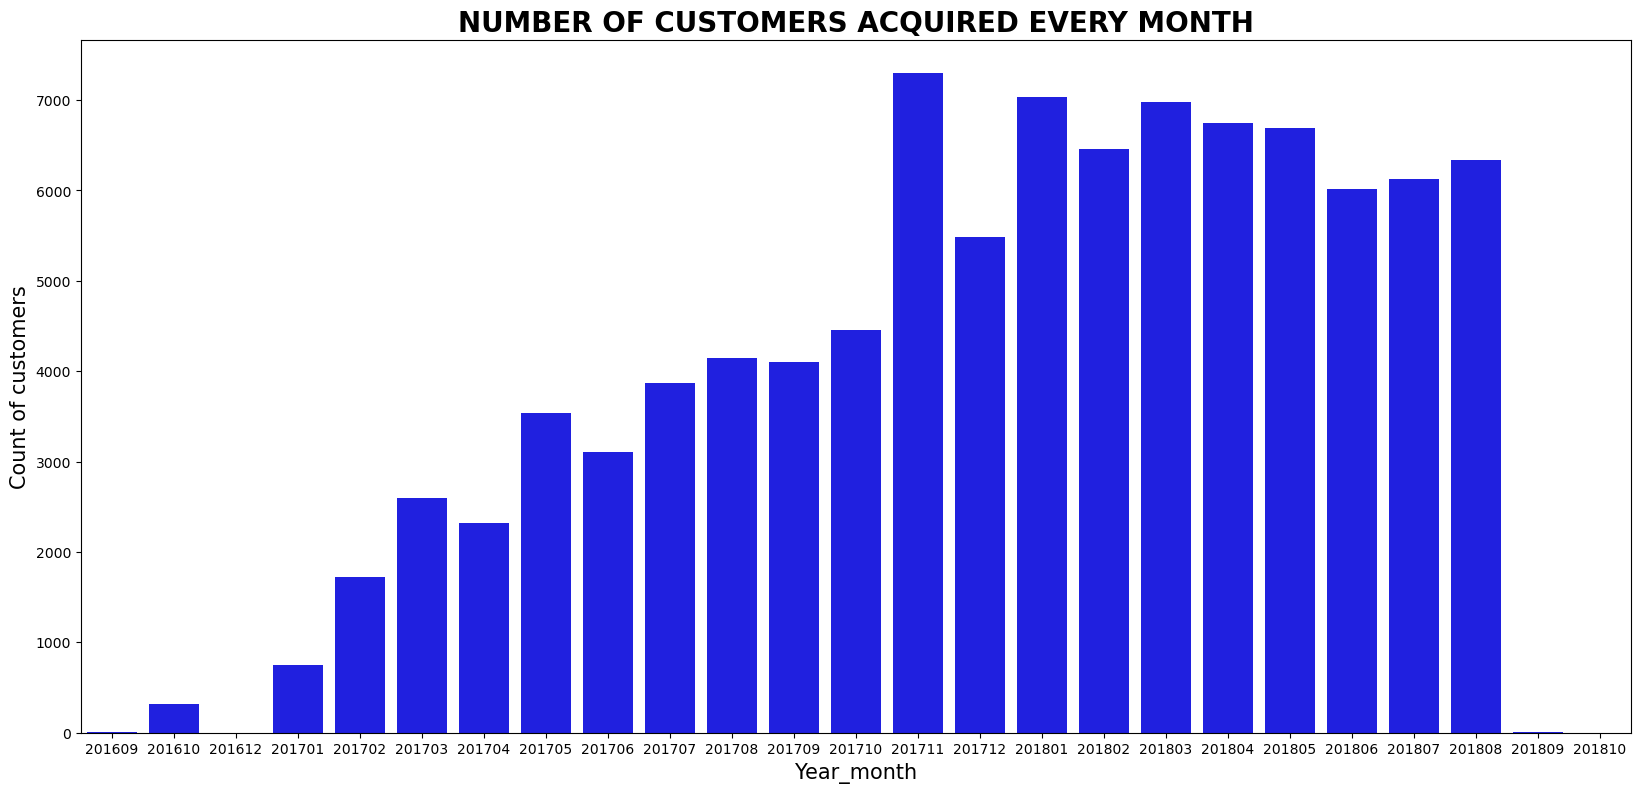

In [20]:
plt.figure(figsize=(20,9))
fig=sns.barplot(data=new_customer_monthly, x='month_of_year', y='customer_unique_id', color='blue' )
plt.title('NUMBER OF CUSTOMERS ACQUIRED EVERY MONTH', fontweight='bold',fontsize=20)
plt.xlabel('Year_month',fontsize=15)
plt.ylabel('Count of customers',fontsize=15)
plt.show()

##### c. Understand the retention of customers on month on month basis

In [21]:
orders['order_purchase_timestamp'] = pd.to_datetime(orders.order_purchase_timestamp, format = '%m/%d/%Y %H:%M')
orders['Year_month'] = orders.order_purchase_timestamp.apply(lambda x: pd.Timestamp.strftime(x , format = "%Y-%m"))
#merging customers and orders data
cust_orders = pd.merge(customers , orders , how = 'left' , on= 'customer_id')
cust_month = cust_orders.loc[:, ['customer_unique_id', 'Year_month']] 
cust_month.drop_duplicates(subset='customer_unique_id' , inplace= True)
cust_month

,customer_unique_id,Year_month
0,861eff4711a542e4b93843c6dd7febb0,2017-05
1,290c77bc529b7ac935b93aa66c333dc3,2018-01
2,060e732b5b29e8181a18229c7b0b2b5e,2018-05
3,259dac757896d24d7702b9acbbff3f3c,2018-03
4,345ecd01c38d18a9036ed96c73b8d066,2018-07
...,...,...
99436,1a29b476fee25c95fbafc67c5ac95cf8,2018-04
99437,d52a67c98be1cf6a5c84435bd38d095d,2018-04
99438,e9f50caf99f032f0bf3c55141f019d99,2018-04
99439,73c2643a0a458b49f58cea58833b192e,2017-11


In [22]:
cust_monthly_cnt = cust_month.groupby('Year_month')[['customer_unique_id']].count().reset_index()
cust_monthly_cnt

,Year_month,customer_unique_id
0,2016-09,4
1,2016-10,315
2,2017-01,749
3,2017-02,1727
4,2017-03,2595
5,2017-04,2318
6,2017-05,3533
7,2017-06,3103
8,2017-07,3864
9,2017-08,4144


In [23]:
new_cust_monthly = cust_orders.groupby('Year_month')[['customer_unique_id']].count()
new_cust_monthly

,customer_unique_id
Year_month,
2016-09,4
2016-10,324
2016-12,1
2017-01,800
2017-02,1780
2017-03,2682
2017-04,2404
2017-05,3700
2017-06,3245


In [24]:
retented_cust_monthly = pd.merge(new_cust_monthly , cust_monthly_cnt , how= 'left' , on ="Year_month")
retented_cust_monthly

,Year_month,customer_unique_id_x,customer_unique_id_y
0,2016-09,4,4.0
1,2016-10,324,315.0
2,2016-12,1,NaN
3,2017-01,800,749.0
4,2017-02,1780,1727.0
5,2017-03,2682,2595.0
6,2017-04,2404,2318.0
7,2017-05,3700,3533.0
8,2017-06,3245,3103.0
9,2017-07,4026,3864.0


In [25]:
retented_cust_monthly['retented_cust'] = retented_cust_monthly.customer_unique_id_x - retented_cust_monthly.customer_unique_id_y
retented_cust_monthly

,Year_month,customer_unique_id_x,customer_unique_id_y,retented_cust
0,2016-09,4,4.0,0.0
1,2016-10,324,315.0,9.0
2,2016-12,1,NaN,NaN
3,2017-01,800,749.0,51.0
4,2017-02,1780,1727.0,53.0
5,2017-03,2682,2595.0,87.0
6,2017-04,2404,2318.0,86.0
7,2017-05,3700,3533.0,167.0
8,2017-06,3245,3103.0,142.0
9,2017-07,4026,3864.0,162.0


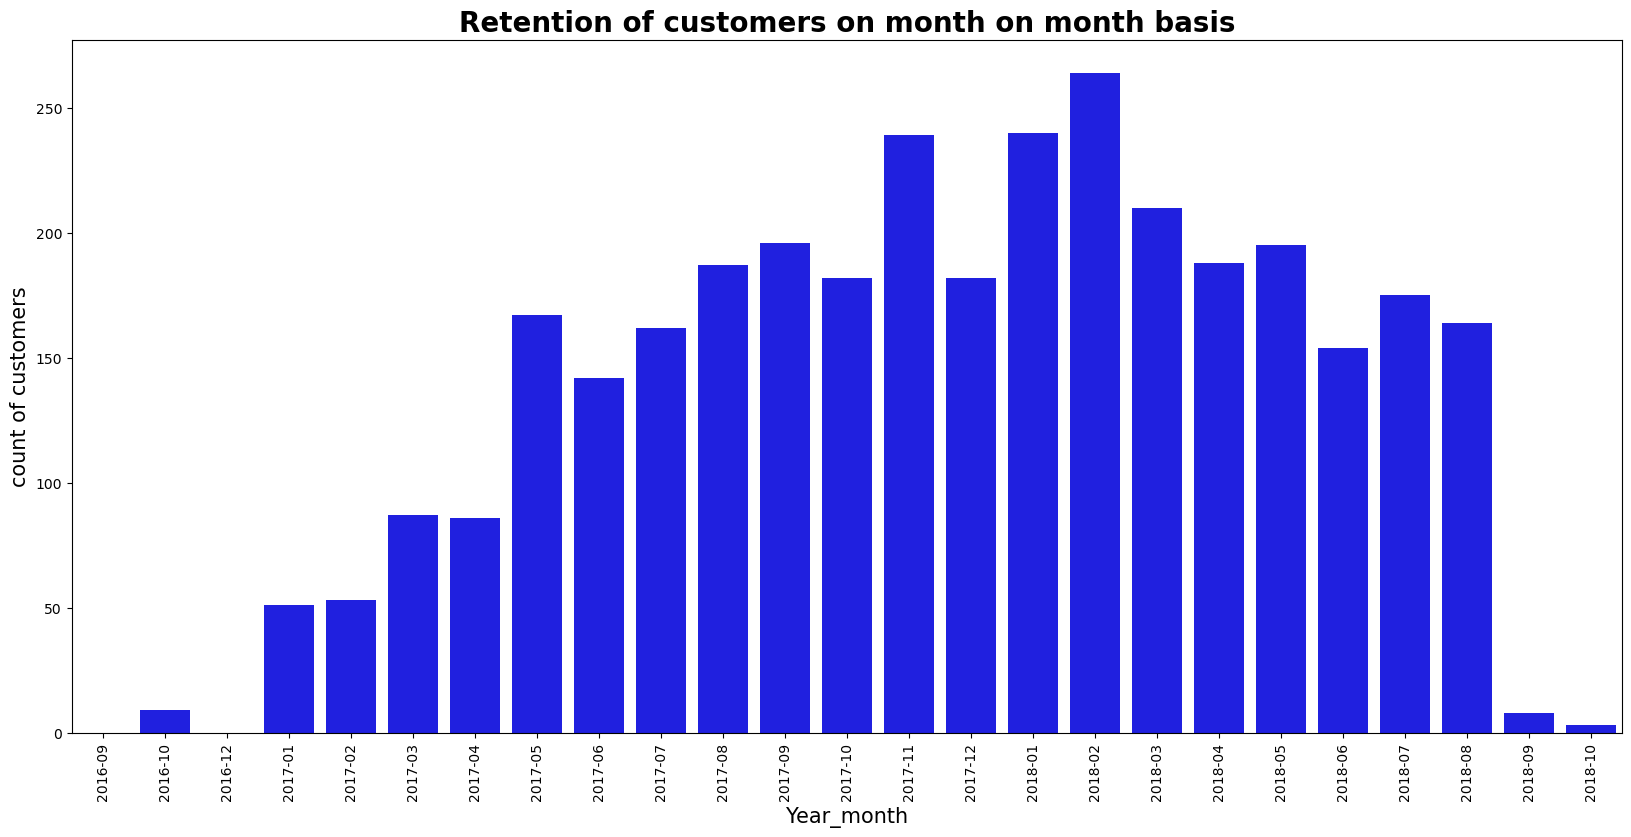

In [26]:
plt.figure(figsize=(20,9))
fig=sns.barplot(data=retented_cust_monthly, x= 'Year_month' , y = 'retented_cust', color='blue' )
plt.title('Retention of customers on month on month basis', fontweight='bold',fontsize=20)
plt.ylabel('count of customers',fontsize=15)
plt.xlabel('Year_month',fontsize=15)
plt.xticks(rotation=90)
plt.show()

##### d. How the revenues from existing/new customers on month on month basis

In [27]:
mon=data.groupby(data.month_of_year).payment_value.sum().reset_index()
mon

,month_of_year,payment_value
0,201609,388.47
1,201610,76959.13
2,201612,19.62
3,201701,190366.65
4,201702,351230.24
5,201703,547556.71
6,201704,511767.50
7,201705,735983.08
8,201706,613152.67
9,201707,746440.01


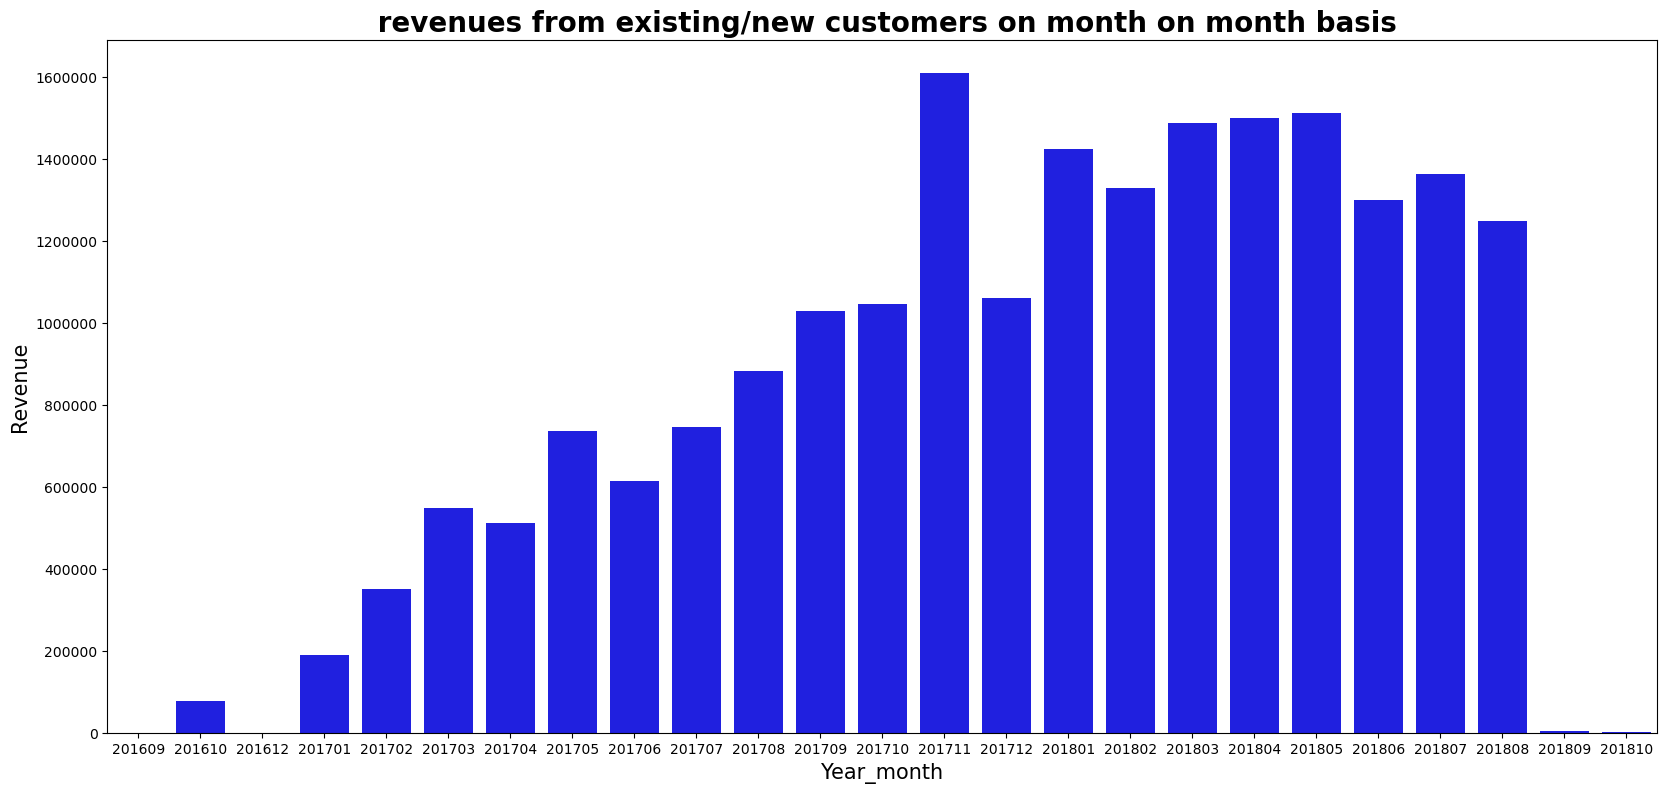

In [28]:
plt.figure(figsize=(20,9))
fig=sns.barplot(data=mon, x='month_of_year', y='payment_value', color='blue' )
plt.title(' revenues from existing/new customers on month on month basis', fontweight='bold',fontsize=20)
plt.xlabel('Year_month',fontsize=15)
plt.ylabel('Revenue',fontsize=15)
plt.ticklabel_format(style='plain',axis='y')
plt.show()

##### e. Understand the trends/seasonality of sales, quantity by category, location, month, week, day, time, channel, payment method etc…

In [29]:
data['yearweek']=data.order_purchase_timestamp.apply( lambda x: pd.Timestamp.strftime(x, format= '%Y%V'))
wkkk=data.groupby(data.yearweek).payment_value.sum().reset_index()
wkkk

,yearweek,payment_value
0,201635,272.46
1,201636,75.06
2,201637,40.95
3,201639,109.34
4,201640,71260.56
...,...,...
96,201837,808.46
97,201838,276.04
98,201839,453.20
99,201840,277.93


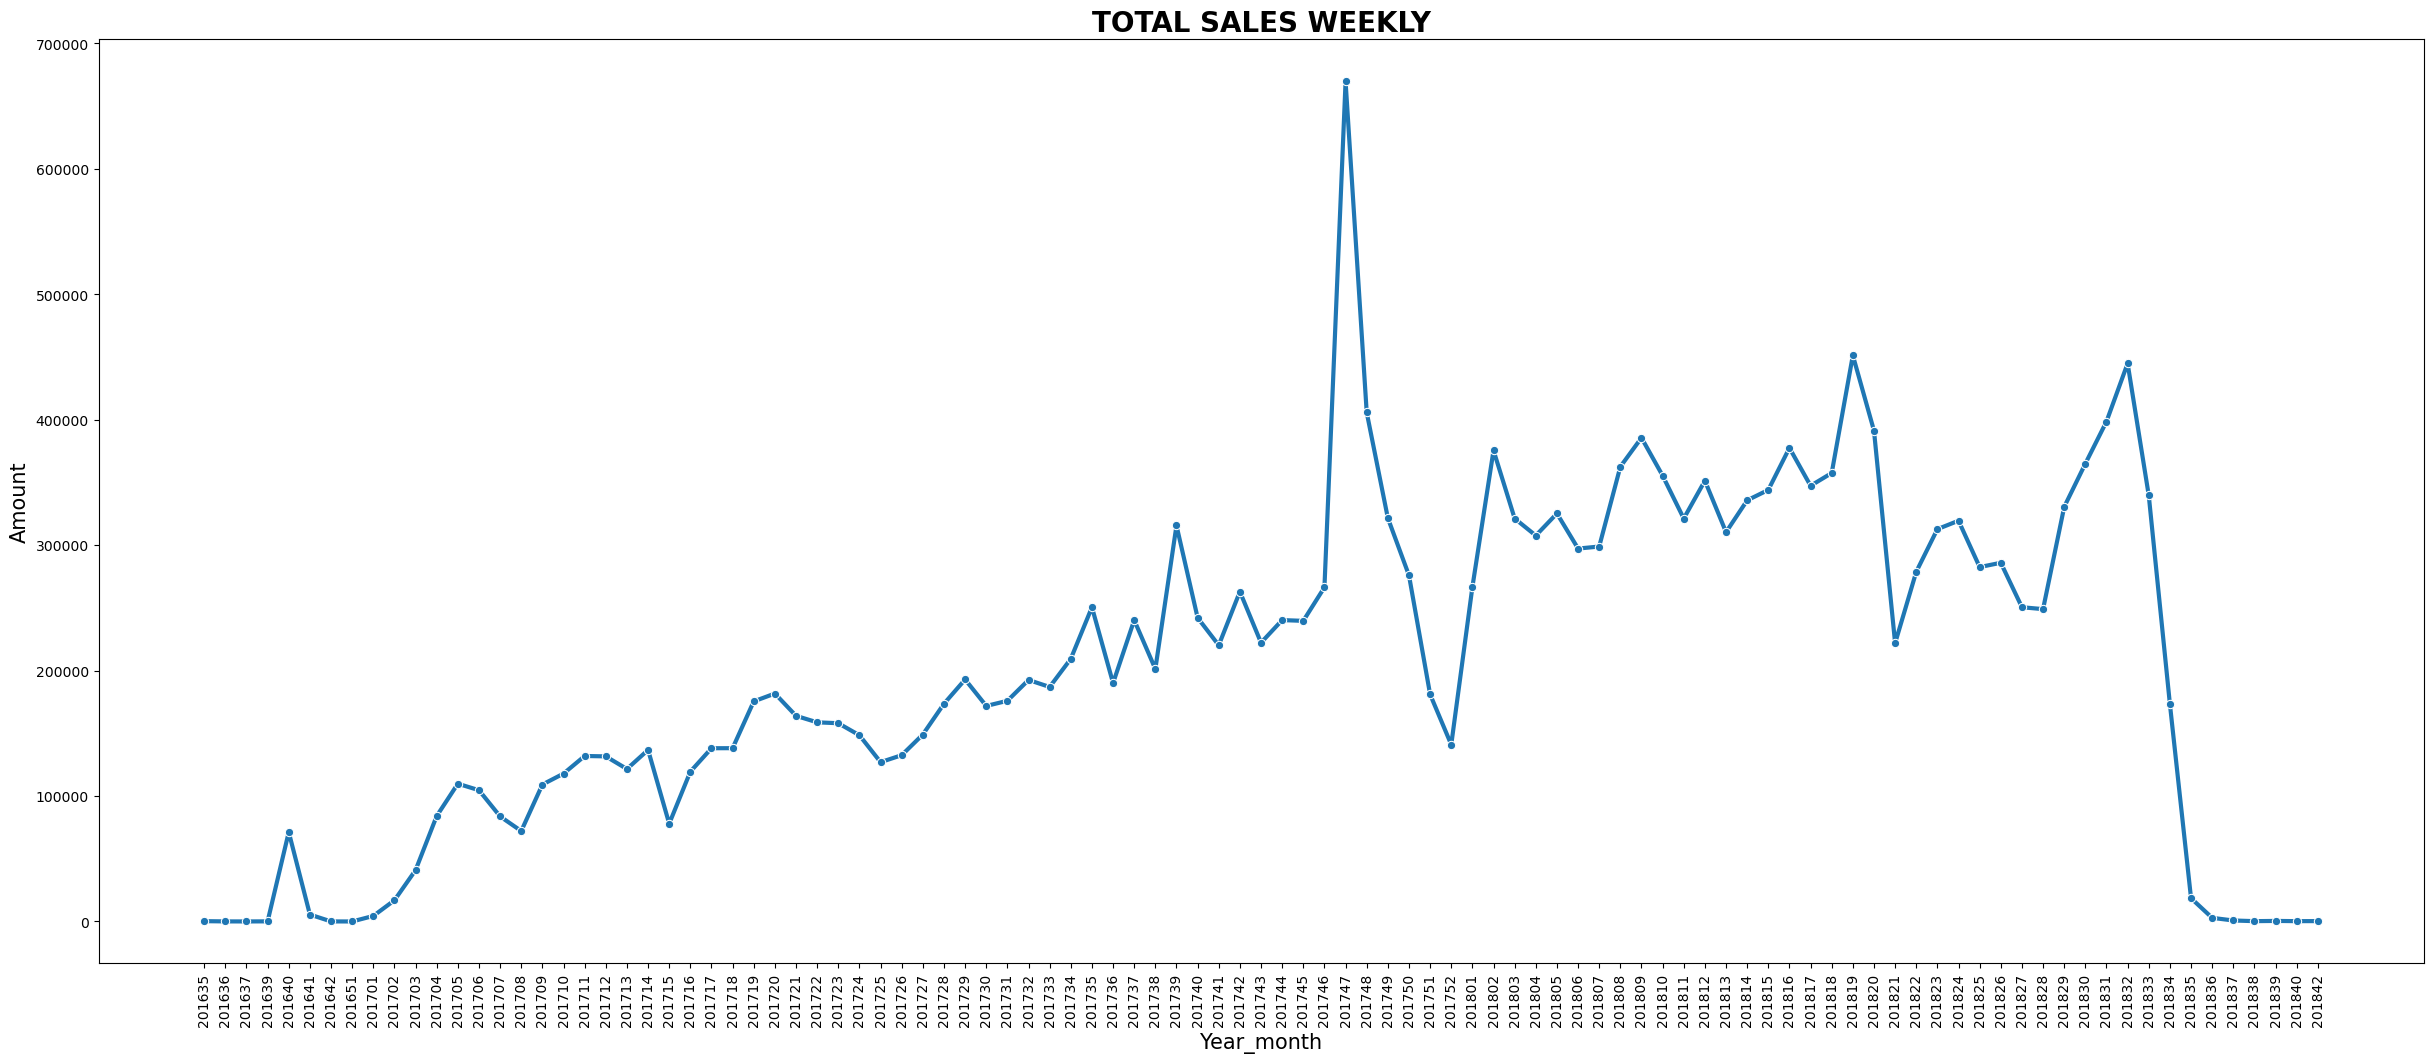

In [30]:
plt.figure(figsize=(30,12))
sns.lineplot(data=wkkk, x='yearweek', y='payment_value', marker="o",linewidth=3)
plt.title('TOTAL SALES WEEKLY', fontweight='bold',fontsize=20)
plt.xlabel('Year_month',fontsize=15)
plt.ylabel('Amount',fontsize=15)
plt.xticks(rotation=90)
plt.show()

In [31]:
# now we'll try to do the day part
data['yearday']=data.order_purchase_timestamp.apply(lambda x: pd.Timestamp.strftime(x, format='%Y%d'))
dyy=data.groupby(data.yearday).payment_value.sum().reset_index()
dyy

,yearday,payment_value
0,201602,109.34
1,201603,595.14
2,201604,14347.77
3,201605,16374.63
4,201606,11645.27
...,...,...
69,201827,331006.84
70,201828,311749.07
71,201829,226559.69
72,201830,251849.75


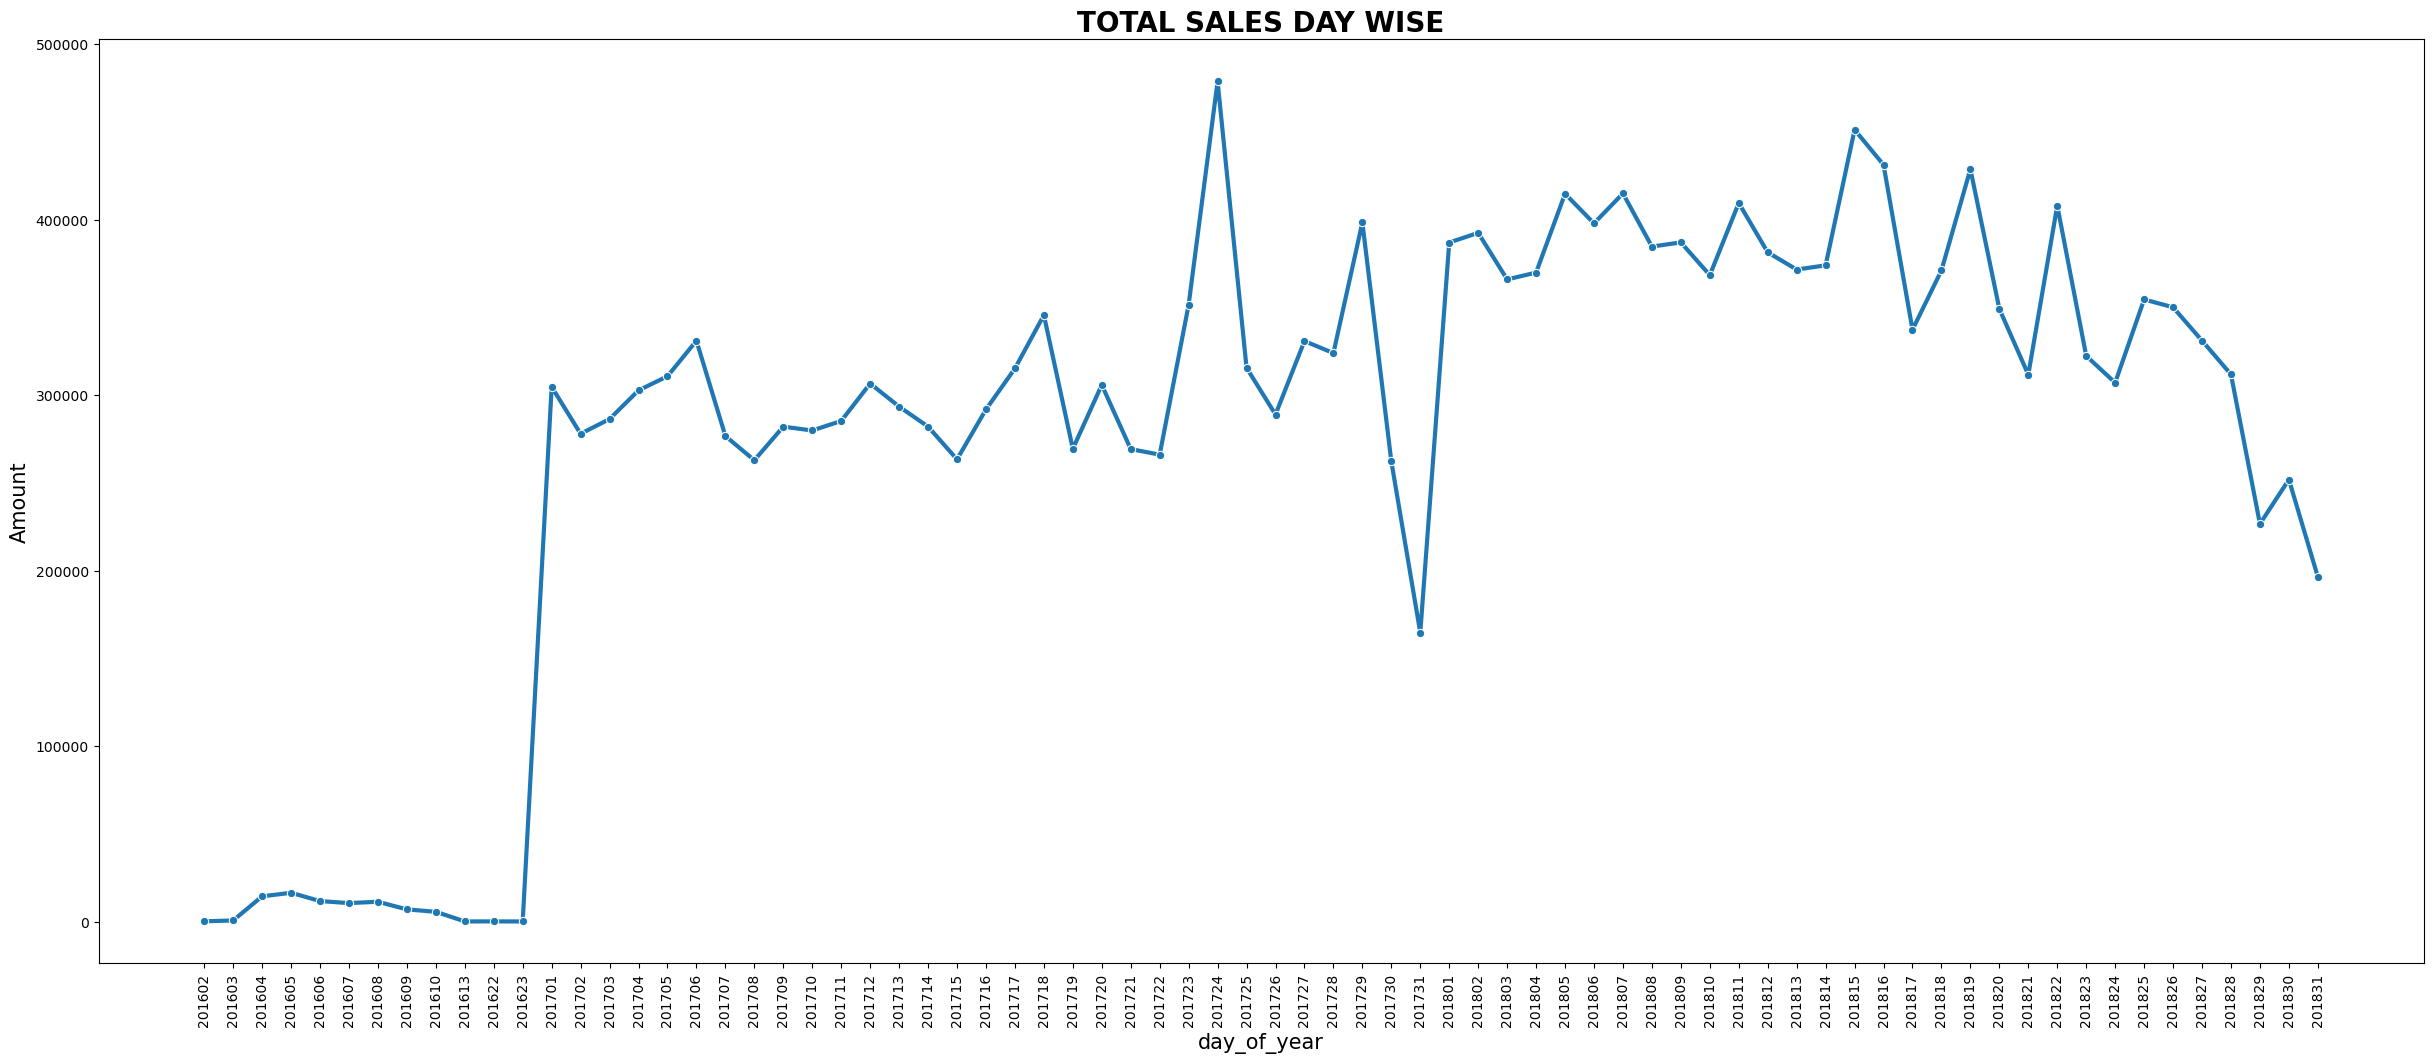

In [32]:
plt.figure(figsize=(30,12))
sns.lineplot(data=dyy, x='yearday', y='payment_value', marker="o",linewidth=3)
plt.title('TOTAL SALES DAY WISE', fontweight='bold',fontsize=20)
plt.xlabel('day_of_year',fontsize=15)
plt.ylabel('Amount',fontsize=15)
plt.xticks(rotation=90)
plt.show()

In [33]:
#Now we've to find total sales by category
qty_by_cat=data.groupby(by='product_category_name').order_id.count().reset_index()
qty_by_cat

,product_category_name,order_id
0,Agro_Industry_And_Commerce,249
1,Air_Conditioning,302
2,Art,219
3,Arts_And_Craftmanship,24
4,Audio,379
...,...,...
66,Stationery,2595
67,Tablets_Printing_Image,87
68,Telephony,4697
69,Toys,4259


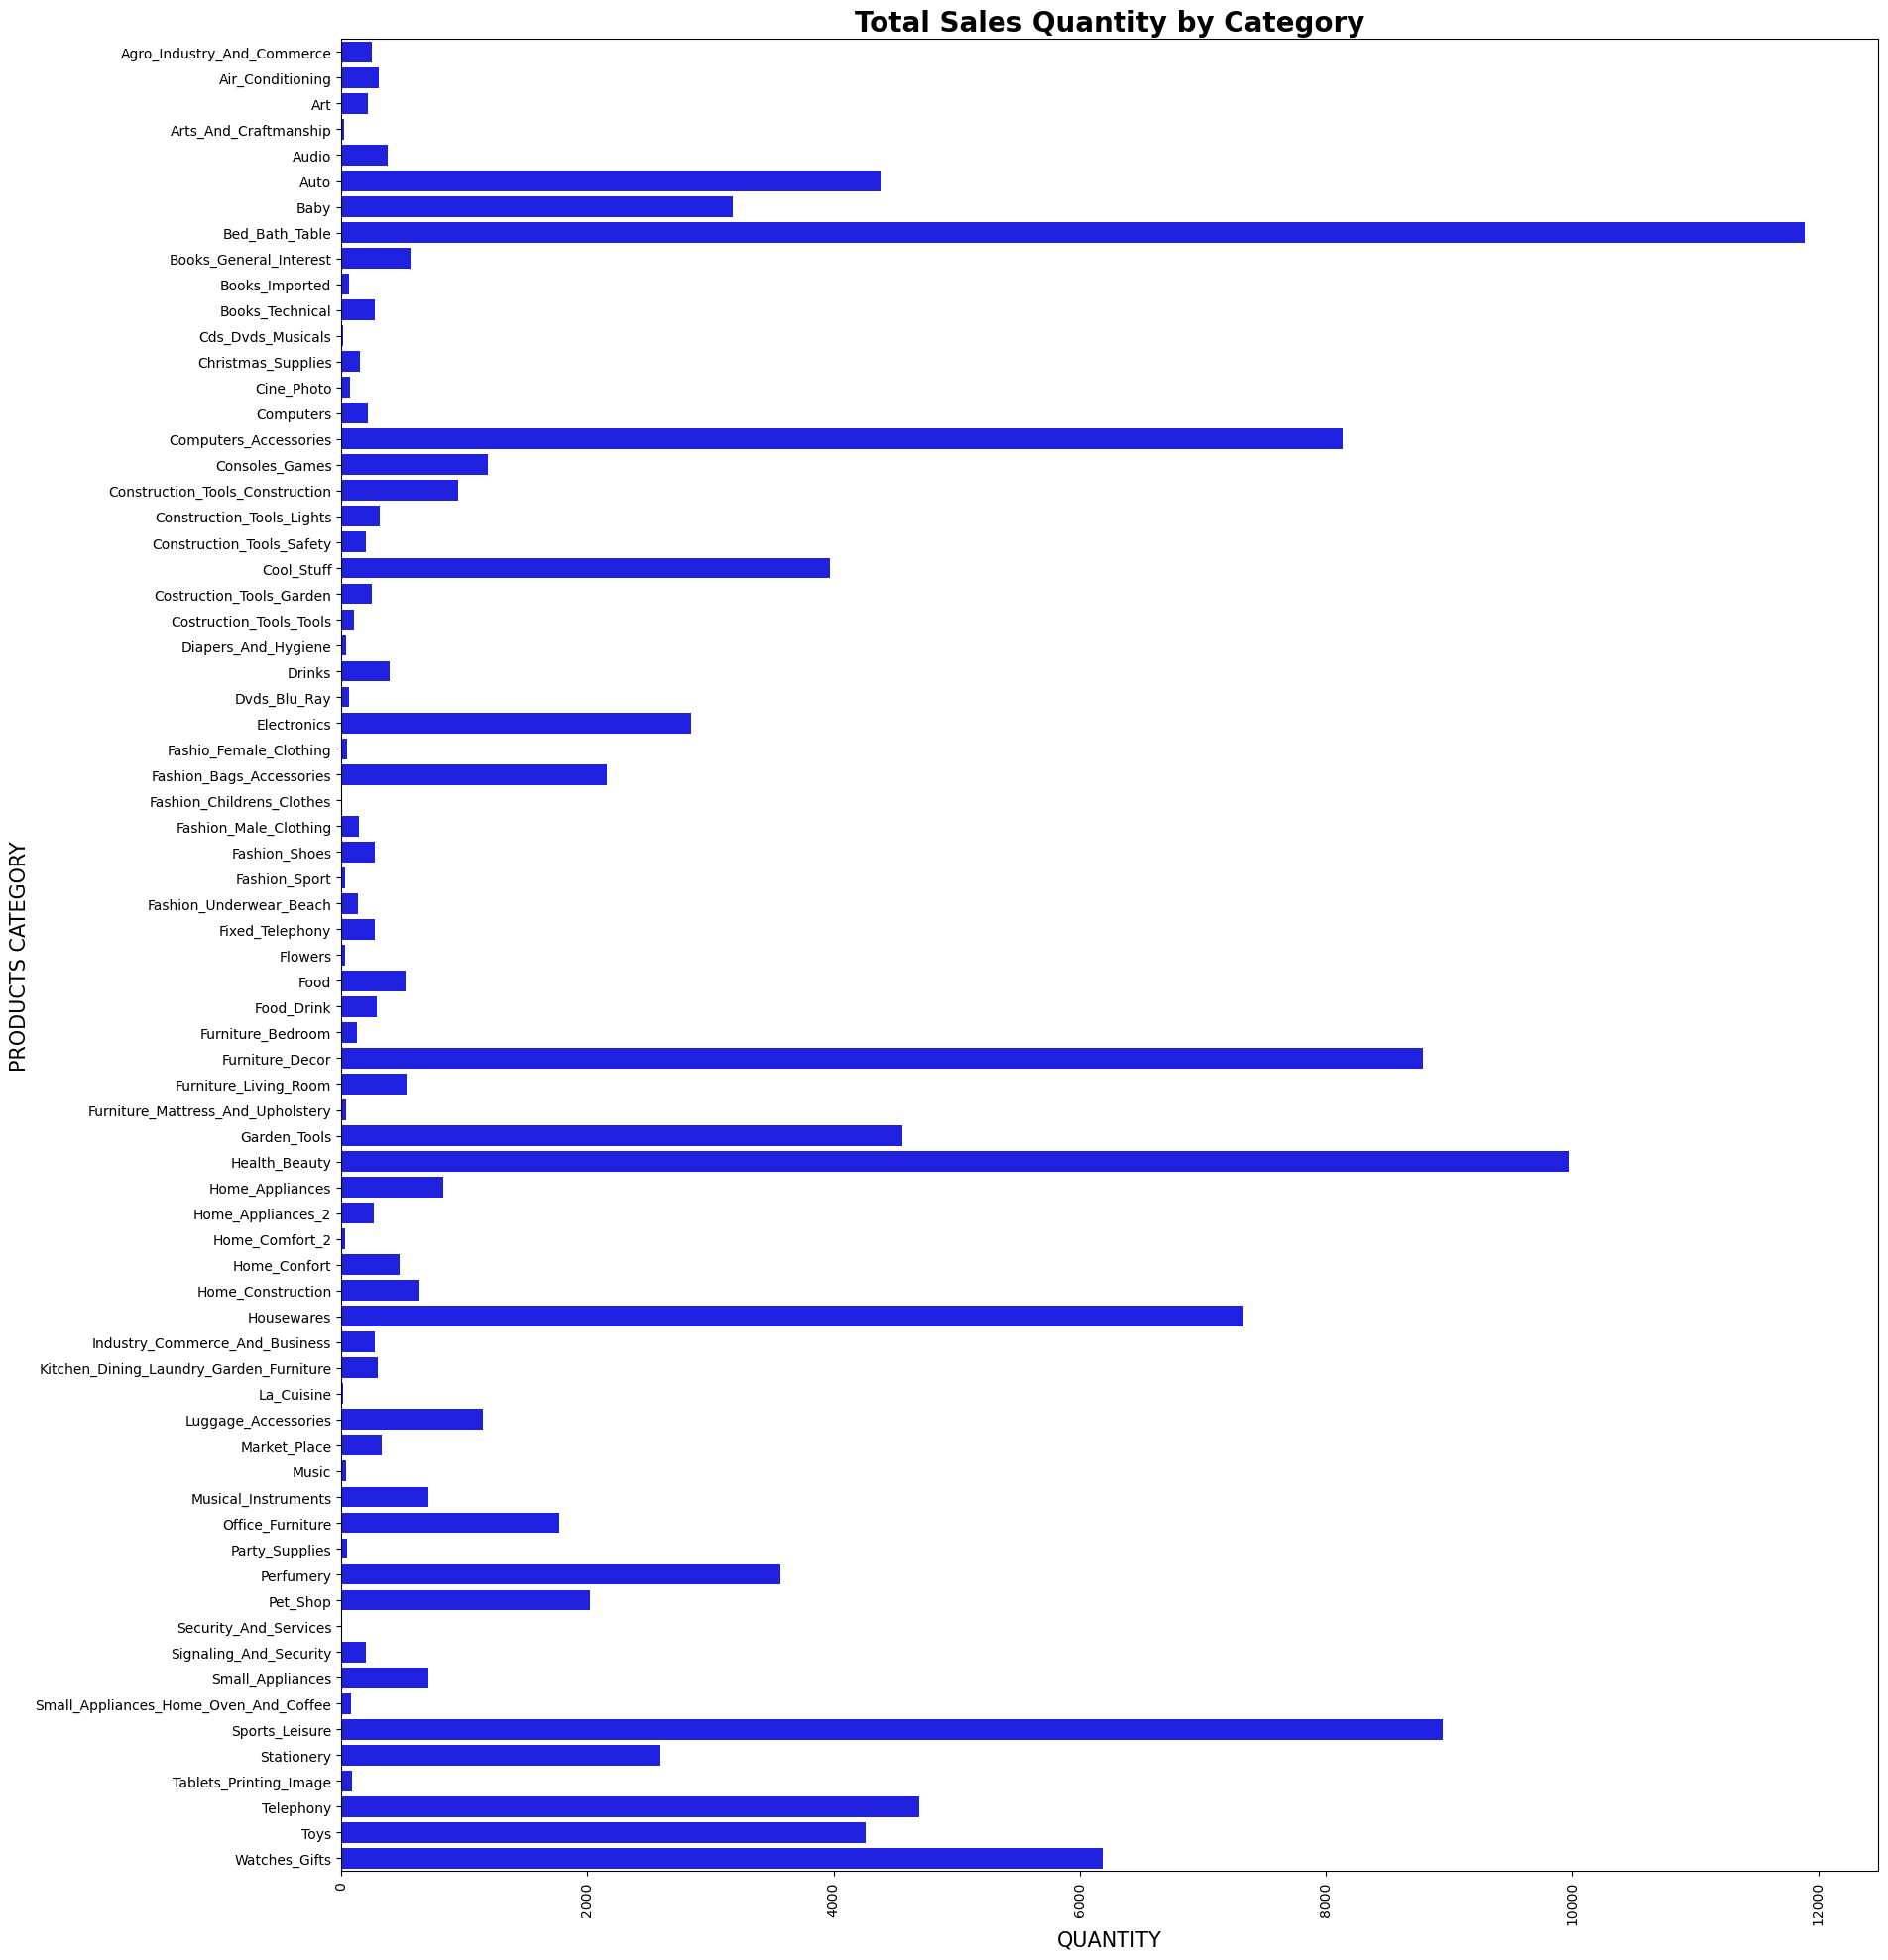

In [34]:
plt.figure(figsize=(20,24))
fig=sns.barplot(data=qty_by_cat, y='product_category_name', x='order_id', color='blue' )
plt.title('Total Sales Quantity by Category', fontweight='bold',fontsize=20)
plt.tick_params(axis="x", labelrotation=90)
plt.xlabel('QUANTITY',fontsize=15)
plt.ylabel('PRODUCTS CATEGORY',fontsize=15)
plt.show()

In [35]:
#Now we've to find total sales by location
qty_loc=data.groupby(data.customer_state).product_id.count().reset_index()
qty_loc

,customer_state,product_id
0,Andhra Pradesh,72306
1,Arunachal Pradesh,1319
2,Chhattisgarh,7390
3,Delhi,3920
4,Goa,10
5,Gujarat,8838
6,Haryana,2614
7,Himachal Pradesh,862
8,Jammu & Kashmir,1822
9,Karnataka,4535


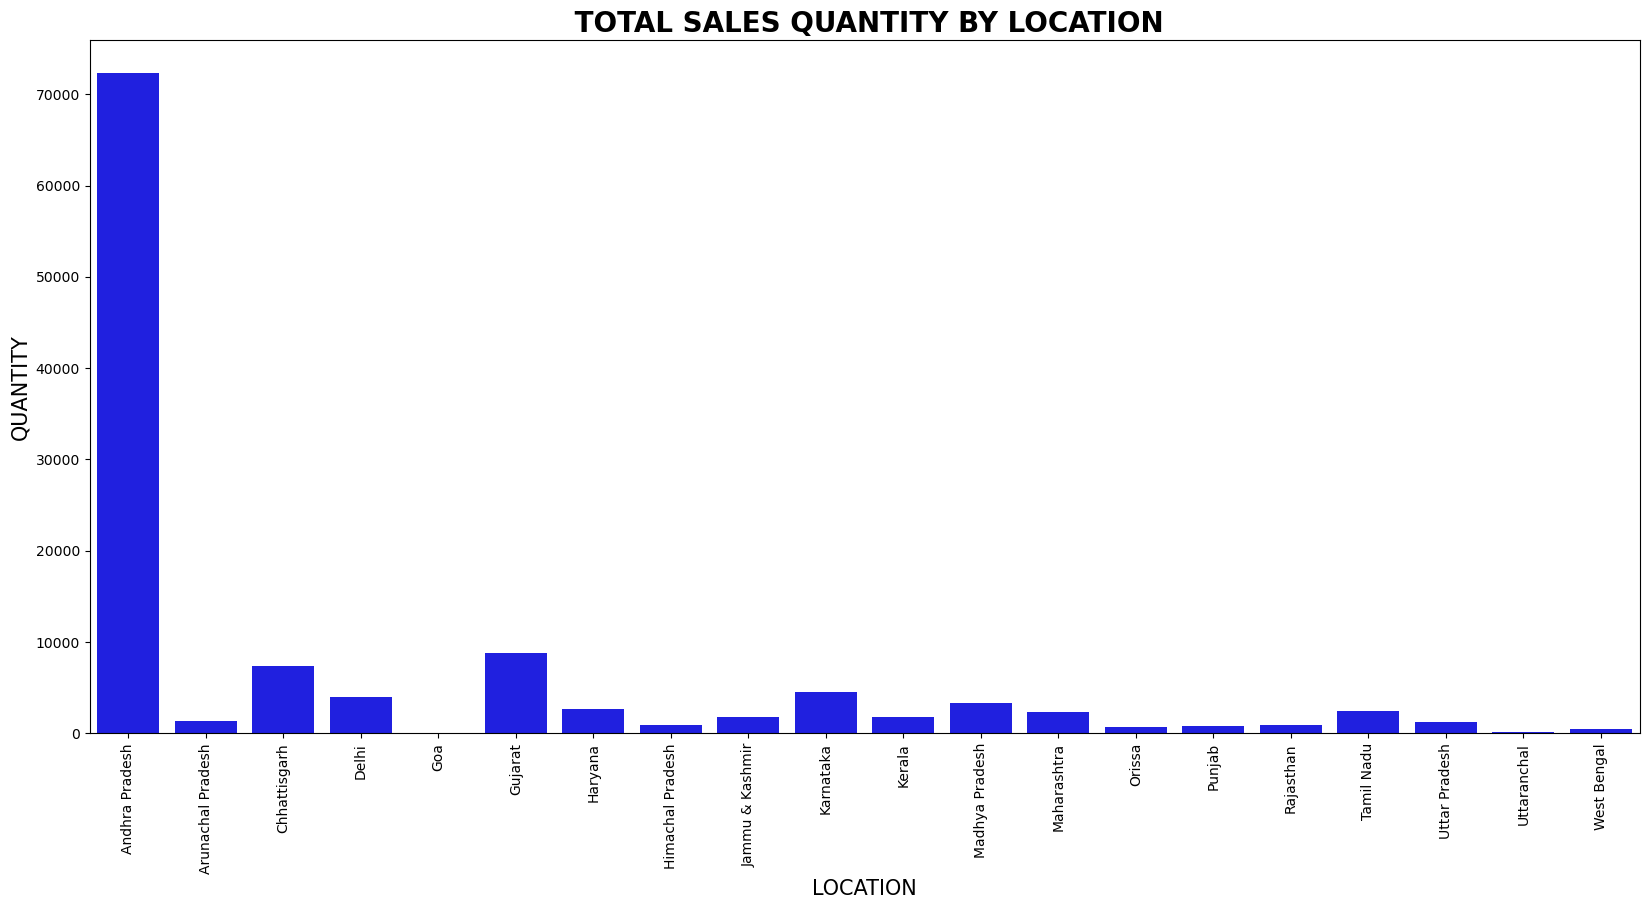

In [36]:
plt.figure(figsize=(20,9))
fig=sns.barplot(data=qty_loc, x='customer_state', y='product_id', color='blue' )
plt.title(' TOTAL SALES QUANTITY BY LOCATION', fontweight='bold',fontsize=20)
plt.xlabel('LOCATION',fontsize=15)
plt.ylabel('QUANTITY',fontsize=15)
plt.xticks(rotation=90)
plt.show()


In [37]:
#Now we've to find total sales quantity by month wise
qty_month=data.groupby(data.month_of_year).product_id.count().reset_index()
qty_month

,month_of_year,product_id
0,201609,3
1,201610,385
2,201612,1
3,201701,1018
4,201702,2052
5,201703,3184
6,201704,2847
7,201705,4418
8,201706,3805
9,201707,4817


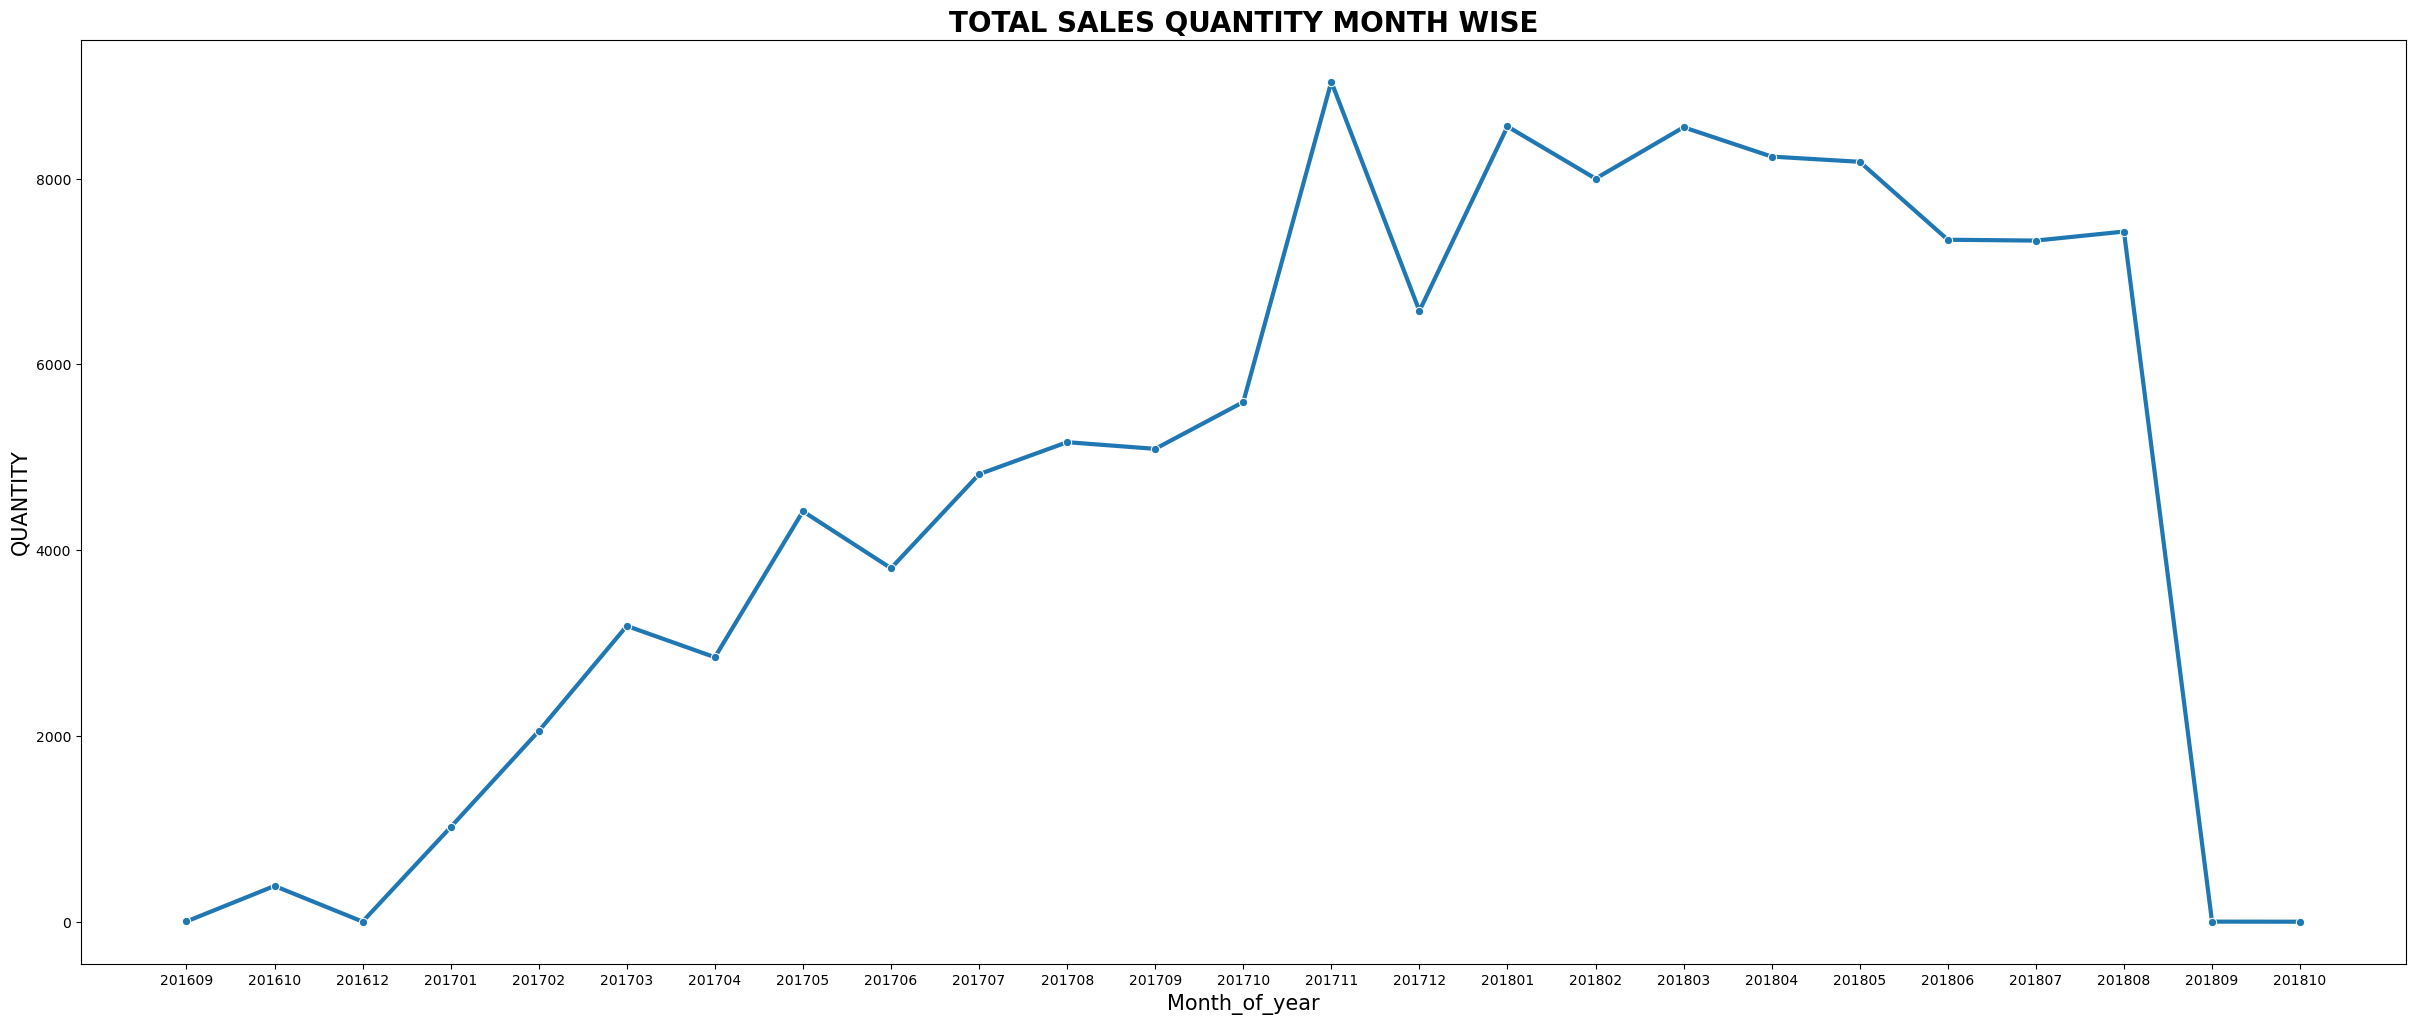

In [38]:
plt.figure(figsize=(30,12))
sns.lineplot(data=qty_month, x='month_of_year', y='product_id', marker="o",linewidth=3)
plt.title('TOTAL SALES QUANTITY MONTH WISE', fontweight='bold',fontsize=20)
plt.xlabel('Month_of_year',fontsize=15)
plt.ylabel('QUANTITY',fontsize=15)
plt.show()

In [39]:
#Now we've to find total sales quantity by week wise
qty_weekly=data.groupby(data.yearweek).product_id.count().reset_index()
qty_weekly

,yearweek,product_id
0,201635,2
1,201636,1
2,201637,0
3,201639,1
4,201640,337
...,...,...
96,201837,0
97,201838,0
98,201839,0
99,201840,0


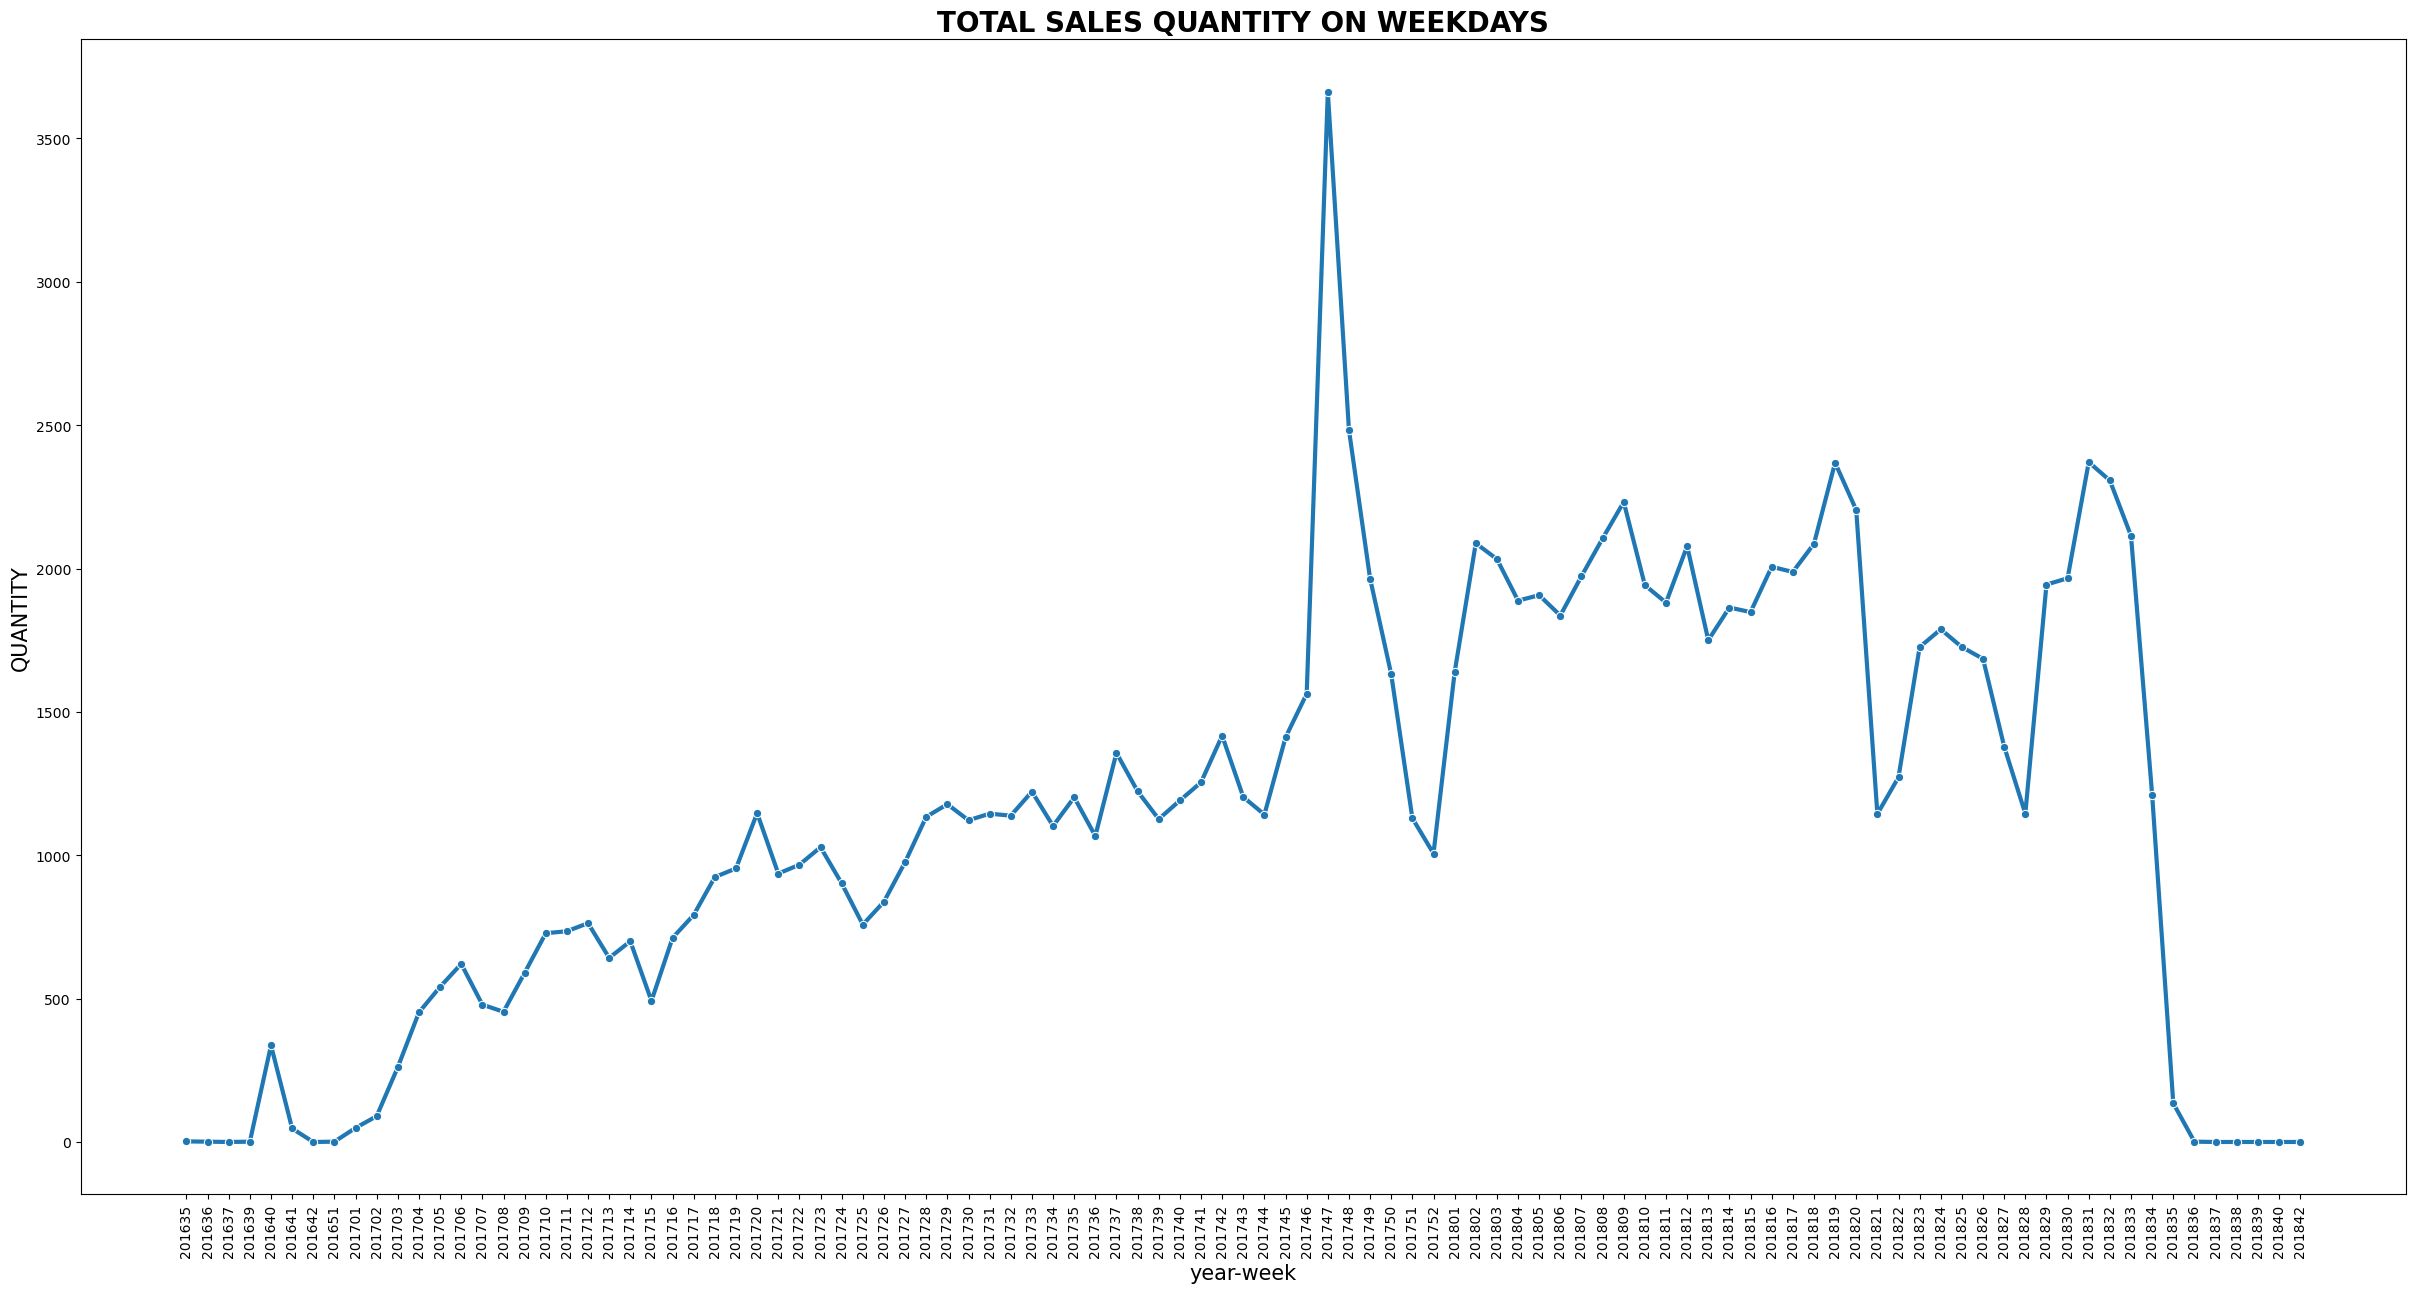

In [40]:
plt.figure(figsize=(30,15))
sns.lineplot(data=qty_weekly, x='yearweek', y='product_id', marker="o",linewidth=3)
plt.title('TOTAL SALES QUANTITY ON WEEKDAYS', fontweight='bold',fontsize=20)
plt.xlabel('year-week',fontsize=15)
plt.ylabel('QUANTITY',fontsize=15)
plt.xticks(rotation=90)
plt.show()

In [41]:
#Now we've to find total sales quantity by day of month wise
qty_monthday=data.groupby(data.yearday).product_id.count().reset_index()
qty_monthday

,yearday,product_id
0,201602,1
1,201603,8
2,201604,78
3,201605,60
4,201606,58
...,...,...
69,201827,1834
70,201828,1729
71,201829,1346
72,201830,1427


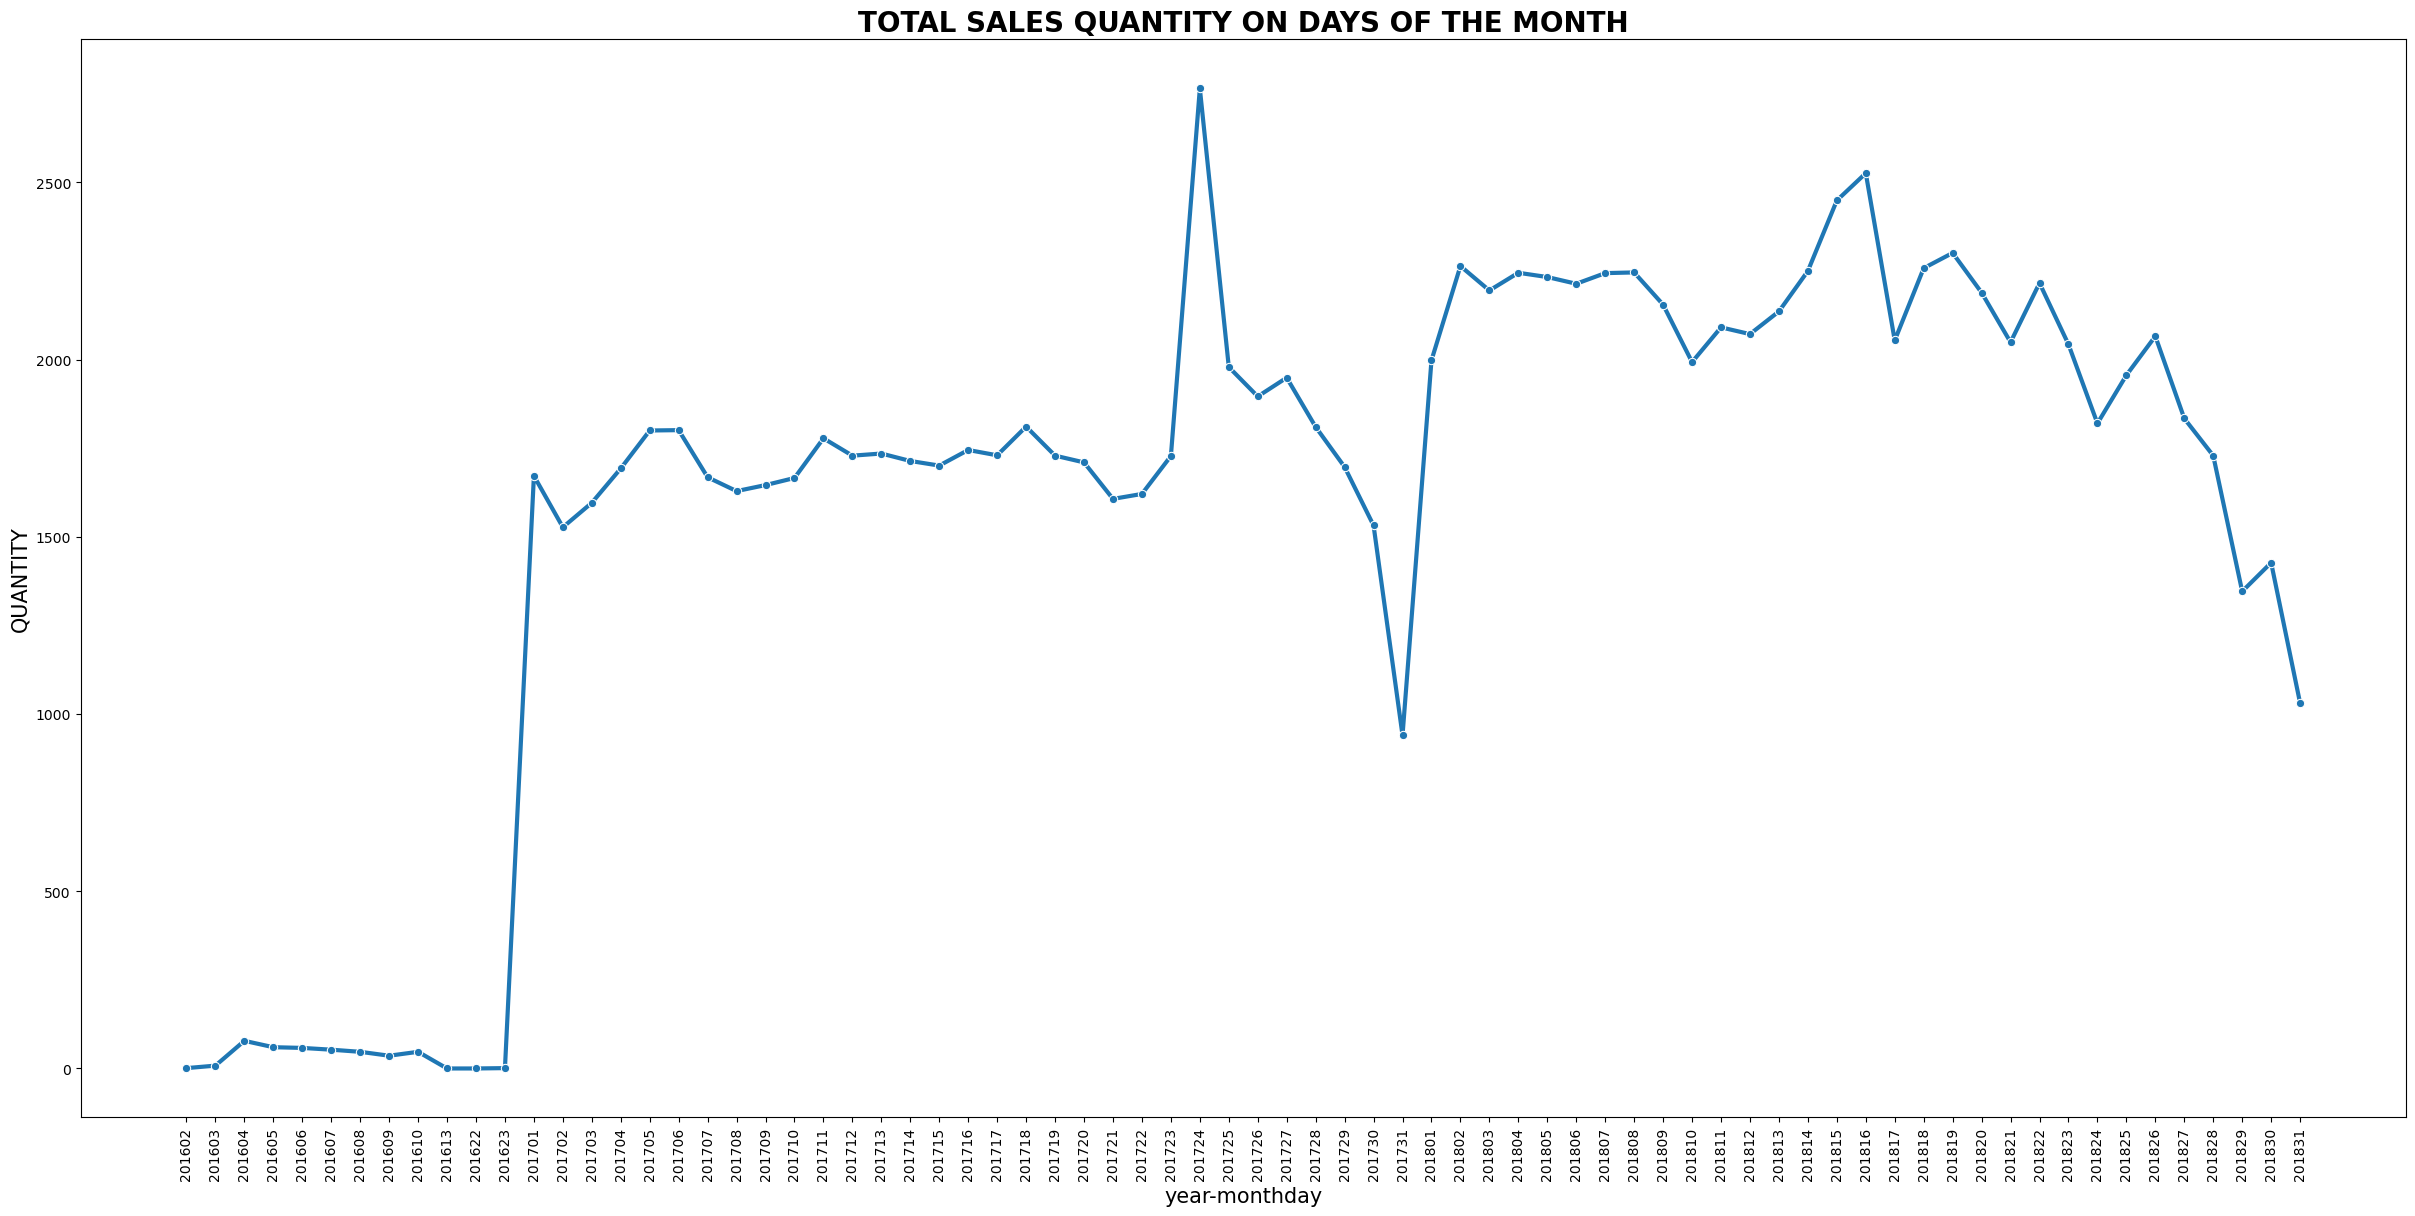

In [42]:
plt.figure(figsize=(30,14))
sns.lineplot(data=qty_monthday, x='yearday', y='product_id', marker="o",linewidth=3)
plt.title('TOTAL SALES QUANTITY ON DAYS OF THE MONTH', fontweight='bold',fontsize=20)
plt.xlabel('year-monthday',fontsize=15)
plt.ylabel('QUANTITY',fontsize=15)
plt.xticks(rotation=90)
plt.show()

In [43]:
#Now we've to find total sales quantity by payment type
f1=data.groupby(data.payment_type).product_id.count().reset_index()
f1

,payment_type,product_id
0,UPI,23018
1,credit_card,87243
2,debit_card,1699
3,not_defined,0
4,voucher,5663


<function matplotlib.pyplot.show(close=None, block=None)>

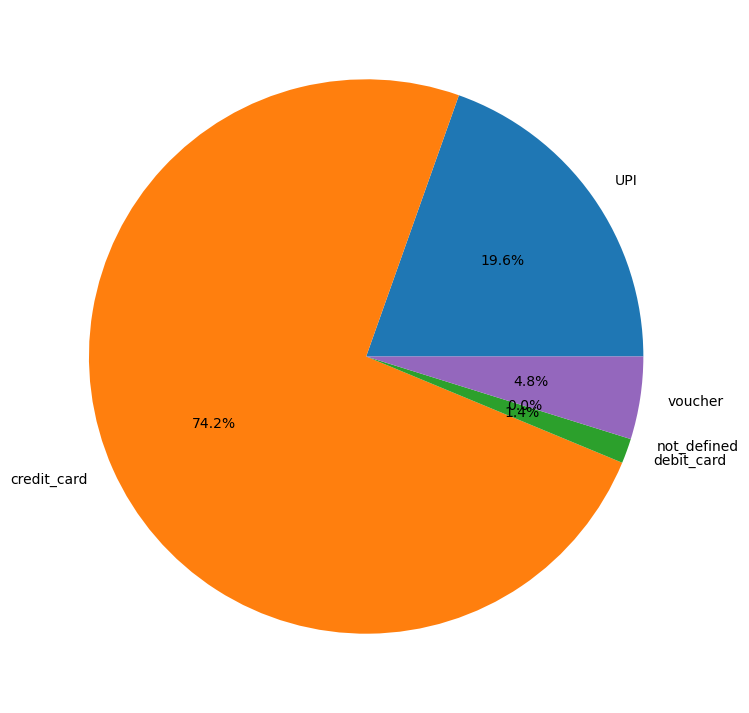

In [44]:
plt.figure(figsize=(15,9))
plt.pie(data= f1, x= 'product_id', labels='payment_type', autopct="%1.1f%%")
plt.show

##### f. Popular Products by month, seller, state, category.

In [48]:
## by month
p=data[['month_of_year','product_id', 'order_id']].groupby(['month_of_year','product_id']).aggregate('count').reset_index()
p=p.sort_values(['month_of_year','order_id' ], ascending=[True, False]).drop_duplicates('month_of_year')
p

,month_of_year,product_id,order_id
0,201609,c1488892604e4ba5cff5b4eb4d595400,1
256,201610,eba7488e1c67729f045ab43fac426f2e,11
277,201612,f5d8f4fbc70ca2a0038b9a0010ed5cb0,1
412,201701,37eb69aca8718e843d897aa7b82f462d,15
1703,201702,a703f5ade6e4fae527357132230ea778,13
3012,201703,7e0dc102074f8285580c9777f79c90cf,45
4901,201704,99a4788cb24856965c36a24e339b6058,38
7008,201705,99a4788cb24856965c36a24e339b6058,66
8488,201706,42a2c92a0979a949ca4ea89ec5c7b934,73
12380,201707,f1c7f353075ce59d8a6f3cf58f419c9c,63


In [49]:
px.bar(p, x='month_of_year', y='order_id', color= 'product_id')

In [50]:
## by state
state=data[['customer_state', 'product_id','order_id']].groupby(['customer_state','product_id' ]).aggregate('count').reset_index()
state=state.sort_values(['customer_state', 'order_id'], ascending=[True, False]).drop_duplicates('customer_state')
state

,customer_state,product_id,order_id
16353,Andhra Pradesh,aca2eb7d00ea1a7b8ebd4e68314663af,346
24307,Arunachal Pradesh,03e1c946c0ddfc58724ff262aef08dff,12
26503,Chhattisgarh,422879e10f46682990de24d770e7f83d,41
30802,Delhi,53759a2ecddad2bb87a079a1f1519f73,24
32584,Goa,2a5806f10d0f00e5ad032dd2e3c8806e,1
36062,Gujarat,aca2eb7d00ea1a7b8ebd4e68314663af,50
38231,Haryana,35afc973633aaeb6b877ff57b2793310,15
39873,Himachal Pradesh,422879e10f46682990de24d770e7f83d,6
41114,Jammu & Kashmir,89b190a046022486c635022524a974a8,15
42520,Karnataka,422879e10f46682990de24d770e7f83d,25


In [51]:
px.bar(state, x='customer_state', color='product_id' ,y='order_id')

In [52]:
#.seller_city
o=data[['seller_city','product_id','order_id']].groupby(['seller_city','product_id']).aggregate('count').reset_index()
o=o.sort_values(['seller_city','order_id'], ascending=[True, False]).drop_duplicates('seller_city')
#o=o[o.order_id>10]
o

,seller_city,product_id,order_id
0,Aadityana,72bf8fd8b4596a7fa2c2cfab031204ed,1
9,Aarambhada,7e6850f360e60da72b7d3b1b37f42312,7
15,Achabal,a48a82499de633cdd782856d69789b62,1
17,Adalaj,4e5dc46fe4e31dd605f374ee43f0268e,10
144,Adilabad,8c292ca193d326152e335d77176746f0,92
...,...,...,...
33346,Yellandu,4618f9c46ea4592eccee4a62718e1560,2
33355,Yemmiganur,304104a478e3a605db6072a22e4ee228,12
33512,Zahirabad,fbce4c4cb307679d89a3bf3d3bb353b9,63
33515,Ziauddin Pur,08574b074924071f4e201e151b152b4e,115


In [53]:
px.bar(o, x='order_id', y='seller_city', color='product_id',height= 1500)

In [54]:
#by product_category
category=data[['product_category_name', 'product_id','order_id']].groupby(['product_category_name', 'product_id']).aggregate('count').reset_index()
category=category.sort_values(['product_category_name','order_id'], ascending=[True, False]).drop_duplicates('product_category_name')
category

,product_category_name,product_id,order_id
7,Agro_Industry_And_Commerce,11250b0d4b709fee92441c5f34122aed,44
144,Air_Conditioning,98e91d0f32954dcd8505875bb2b42cdb,17
218,Art,4fe644d766c7566dbc46fb851363cb3b,109
267,Arts_And_Craftmanship,b9976e9c22fb1540bd71d1bcd2989475,5
316,Audio,db5efde3ad0cc579b130d71c4b2db522,50
...,...,...,...
28426,Stationery,fb55982be901439613a95940feefd9ee,85
28449,Tablets_Printing_Image,6bbe55cf8f85c87b6eebb775a53402f4,35
29470,Telephony,e7cc48a9daff5436f63d3aad9426f28b,95
30360,Toys,880be32f4db1d9f6e2bec38fb6ac23ab,106


In [55]:
px.bar(category, y='product_category_name', x='order_id', color='product_id', height= 1500)

##### g. Popular categories by state, month

In [56]:
st_mon=data[['customer_state','product_category_name','order_id']].groupby(['customer_state','product_category_name']).aggregate('count').reset_index()
st_mon=st_mon.sort_values(['customer_state' ,'order_id'], ascending=[True, False]).drop_duplicates('customer_state')
st_mon

,customer_state,product_category_name,order_id
7,Andhra Pradesh,Bed_Bath_Table,7662
77,Arunachal Pradesh,Bed_Bath_Table,128
132,Chhattisgarh,Bed_Bath_Table,726
229,Delhi,Health_Beauty,334
255,Goa,Auto,1
272,Gujarat,Bed_Bath_Table,808
339,Haryana,Bed_Bath_Table,296
396,Himachal Pradesh,Bed_Bath_Table,85
448,Jammu & Kashmir,Bed_Bath_Table,178
505,Karnataka,Bed_Bath_Table,407


In [57]:
px.bar(st_mon, x='customer_state', color='product_category_name', y='order_id')

In [58]:
st_mon=data[['month_of_year','product_category_name','order_id']].groupby(['month_of_year','product_category_name']).aggregate('count').reset_index()
st_mon=st_mon.sort_values(['month_of_year' ,'order_id'], ascending=[True, False]).drop_duplicates('month_of_year')
st_mon

,month_of_year,product_category_name,order_id
0,201609,Furniture_Decor,2
20,201610,Furniture_Decor,80
33,201612,Fashion_Bags_Accessories,1
55,201701,Furniture_Decor,204
104,201702,Furniture_Decor,283
154,201703,Furniture_Decor,346
186,201704,Bed_Bath_Table,309
245,201705,Bed_Bath_Table,426
302,201706,Bed_Bath_Table,431
362,201707,Bed_Bath_Table,641


In [59]:
px.bar(st_mon, x='month_of_year', color='product_category_name', y='order_id')

##### h. List top 10 most expensive products sorted by price

In [60]:
u=data.groupby(data.product_category_name).price.sum().sort_values(ascending= False).reset_index().head(10)
u

,product_category_name,price
0,Health_Beauty,1295017.44
1,Watches_Gifts,1251312.51
2,Bed_Bath_Table,1101963.55
3,Sports_Leisure,1024136.32
4,Computers_Accessories,947665.59
5,Furniture_Decor,768556.72
6,Housewares,665525.49
7,Cool_Stuff,661576.55
8,Auto,616742.46
9,Garden_Tools,515229.07


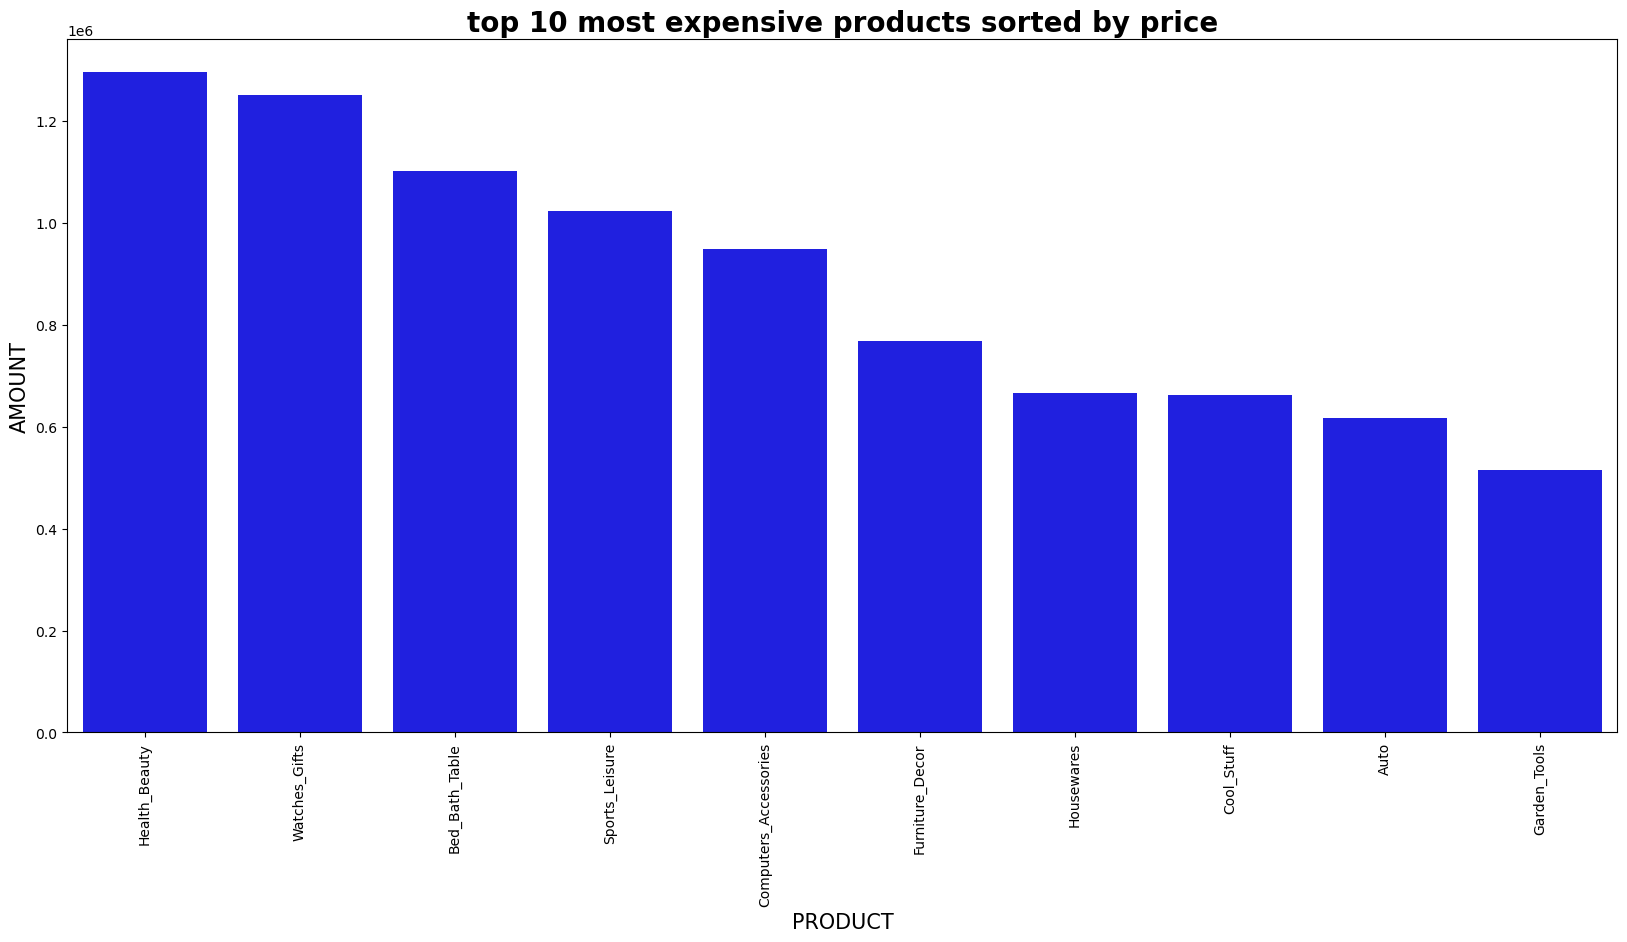

In [61]:
plt.figure(figsize=(20,9))
fig=sns.barplot(data=u, x='product_category_name', y='price', color='blue' )
plt.title('top 10 most expensive products sorted by price', fontweight='bold',fontsize=20)
plt.xlabel('PRODUCT',fontsize=15)
plt.ylabel('AMOUNT',fontsize=15)
plt.xticks(rotation=90)
plt.show()

#### 2. Performing Customers/sellers Segmentation

##### a. Divide the customers into groups based on the revenue generated

In [62]:
tr=data.groupby(by='customer_unique_id')[['payment_value']].sum().reset_index()

In [63]:
tr.rename(columns={'payment_value': 'total_revenue_per_customer'}, inplace=True)

In [64]:
# now merge the df tr and data on customer_id
data=pd.merge(left=data,right=tr, on='customer_unique_id',how='left')

In [65]:
# get idea of customer spend
print(data.total_revenue_per_customer.min())
print(data.total_revenue_per_customer.max())
print(data.total_revenue_per_customer.mean())

0.0
109312.64
383.42338922802844


In [66]:
# define segment of customer based on spend
data['customer_segment']=data.total_revenue_per_customer.apply(lambda x: 'high budget' if x>1000  else 'mid budget' if  (x>=500 ) else 'low budget' if (x>=1) else 'zero spend' )
cg=data.customer_segment.value_counts().reset_index()
cg

,index,customer_segment
0,low budget,102067
1,mid budget,9028
2,high budget,7340
3,zero spend,2


Text(0, 0.5, 'Revenue')

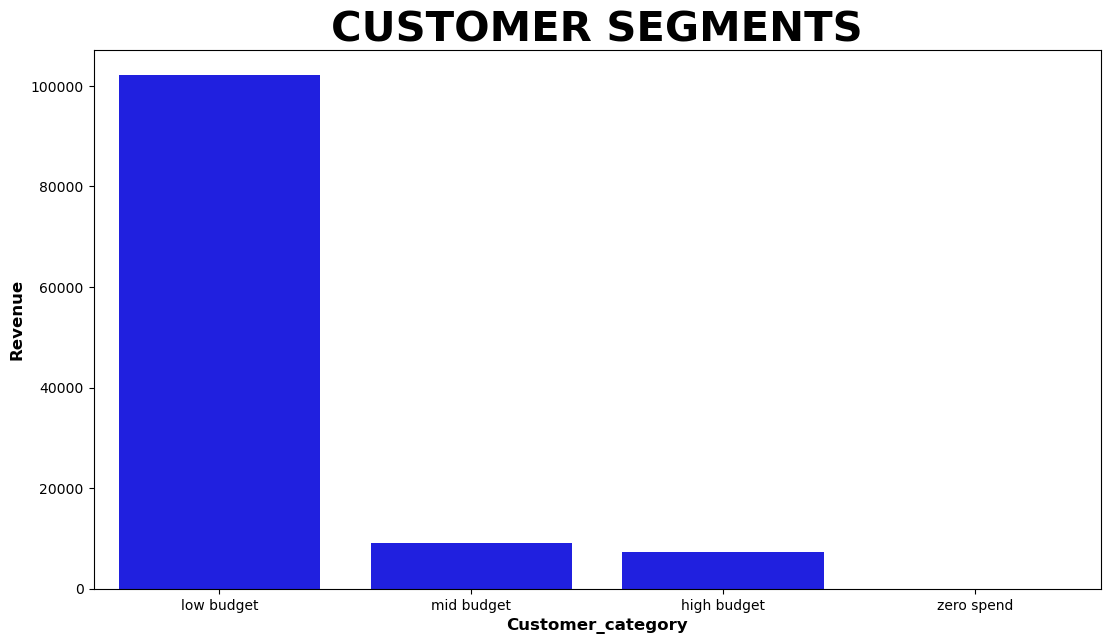

In [67]:
plt.figure(figsize=(13, 7))
fig=sns.barplot(data = cg, x= 'index', y='customer_segment', color='blue')
plt.title('CUSTOMER SEGMENTS', fontsize=30, fontweight='bold')
plt.xlabel("Customer_category" , fontsize=12, fontweight='bold')
plt.ylabel("Revenue" , fontsize=12, fontweight='bold')

##### b. Divide the sellers into groups based on the revenue generated

In [68]:
trs=data.groupby(data.seller_id).price.sum().reset_index()

In [69]:
trs.rename(columns={'price':'populer_prod_by_seller'}, inplace=True)

In [70]:
#now merge trs and data on seller id
data=pd.merge(left=data, right= trs, how='left', on='seller_id')

In [71]:
#try to get some idea od seller segment
print(data.populer_prod_by_seller.min())
print(data.populer_prod_by_seller.mean())
print(data.populer_prod_by_seller.max())

3.5
42587.82359453508
237695.75


In [72]:
data['seller_segment']=data.populer_prod_by_seller.apply(lambda x:  'best seller' if x>150000 else 'good seller' if (x>=50000) else 'bad seller' if (x>=20000) else 'worst seller')

In [73]:
sg=data.seller_segment.value_counts().reset_index()
sg

,index,seller_segment
0,worst seller,67932
1,bad seller,21870
2,good seller,20825
3,best seller,7810


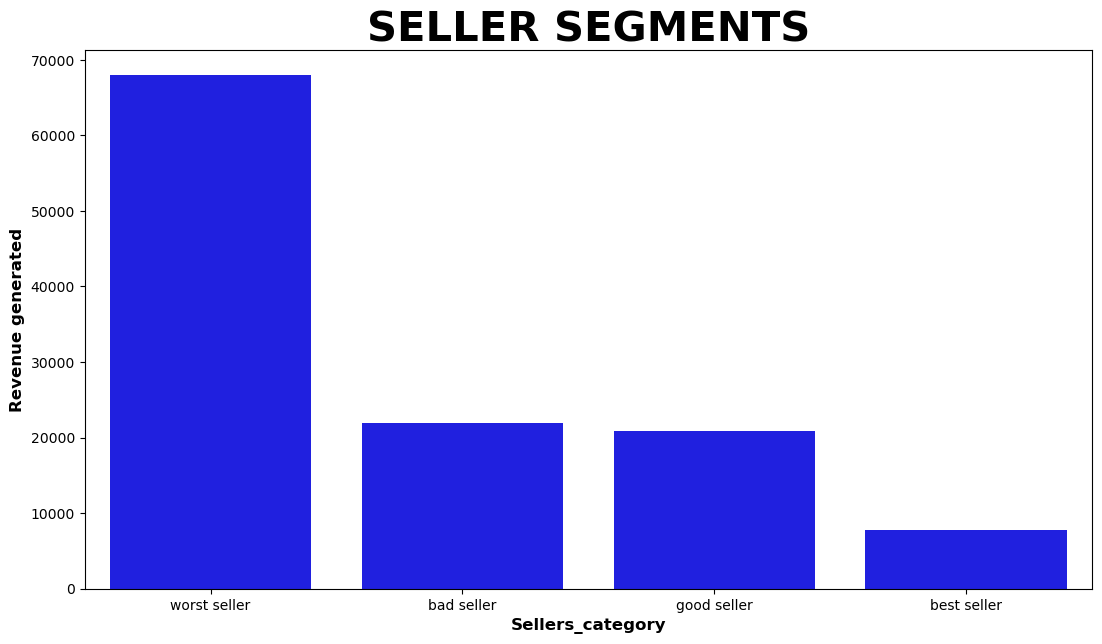

In [74]:
plt.figure(figsize=(13,7))
fig=sns.barplot(data= sg, x='index', y='seller_segment', color='blue')
plt.xlabel('Sellers_category', fontsize=12, fontweight='bold')
plt.ylabel('Revenue generated', fontsize= 12, fontweight='bold')
plt.title('SELLER SEGMENTS', fontsize=30, fontweight='bold')
plt.show()

### 3. Cross-Selling (Which products are selling together)


In [75]:
orders_order_items = pd.merge(orders , order_items , how='left' , on='order_id' )
orders_order_items.head(2)

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,Year_month,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:00,10/2/2017 11:07,10/4/2017 19:55,10/10/2017 21:25,10/18/2017 0:00,2017-10,1.0,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,10/6/2017 11:07,29.99,8.72
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:00,7/26/2018 3:24,7/26/2018 14:31,8/7/2018 15:27,8/13/2018 0:00,2018-07,1.0,595fac2a385ac33a80bd5114aec74eb8,289cdb325fb7e7f891c38608bf9e0962,7/30/2018 3:24,118.70,22.76


In [76]:
cross_selling = orders_order_items[orders_order_items.duplicated(['order_purchase_timestamp','customer_id'],
                                                                 keep=False)].sort_values(by='order_purchase_timestamp')
cross_selling = cross_selling.loc[:,['customer_id','order_purchase_timestamp','product_id' ]]

cross_selling.drop_duplicates(subset ="product_id" ,inplace=True)
cross_selling = cross_selling[cross_selling.duplicated(['order_purchase_timestamp','customer_id'],
                                                       keep=False)].sort_values(by='order_purchase_timestamp').reset_index()
cross_selling.drop(columns = 'index',axis=1, inplace=True)

print('Products with same customer id and order purchase timestamp are cross selling')
cross_selling

Products with same customer id and order purchase timestamp are cross selling


,customer_id,order_purchase_timestamp,product_id
0,08c5351a6aca1c1589a38f244edeee9d,2016-09-04 21:15:00,f293394c72c9b5fafd7023301fc21fc2
1,08c5351a6aca1c1589a38f244edeee9d,2016-09-04 21:15:00,c1488892604e4ba5cff5b4eb4d595400
2,a0f95ab56c6d3a5ba0036b7fdfeda07f,2016-10-04 15:02:00,79938780eb7ffb7289f59a9a283bc06b
3,a0f95ab56c6d3a5ba0036b7fdfeda07f,2016-10-04 15:02:00,8f1e43e0e3374ed8c84df748034d6179
4,00474d2582fd72663036795b7ab8cfc1,2016-10-04 22:33:00,35bd74b6319ba18ae4f30d8b54144fd2
...,...,...,...
3566,72a366446dd3abfc90c598896714d85c,2018-08-26 11:02:00,7052c556fc966a2321d570f3c5a8790f
3567,e5a8aaccb766e00177b0a587979cc814,2018-08-26 11:44:00,df4bcf4a328103951507064660c445e9
3568,e5a8aaccb766e00177b0a587979cc814,2018-08-26 11:44:00,3af5874bd2429ed183a5445d1432fcde
3569,c24bbeb8111fea27eab791a37e665210,2018-08-27 12:39:00,b6b220a6c539cb65be34eed6fea8fe63


#### 4. Payment Behaviour

##### a. How customers are paying?

In [77]:
paying=data.payment_type.value_counts().reset_index()
paying

,index,payment_type
0,credit_card,87761
1,UPI,23190
2,voucher,5777
3,debit_card,1706
4,not_defined,3


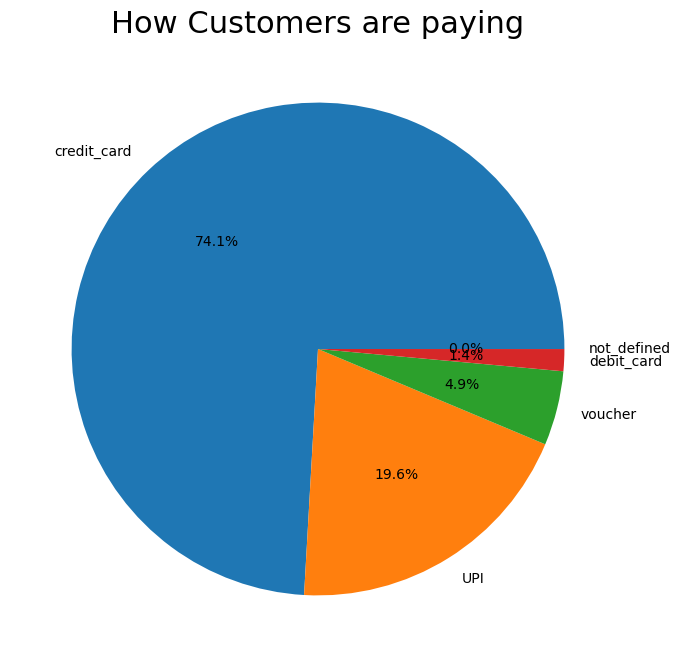

In [78]:
plt.figure(figsize=(13,8))
plt.pie(data=paying,x='payment_type', labels='index', autopct='%1.1f%%' )
plt.title("How Customers are paying", fontsize=22)
plt.show()

##### b. Which payment channels are used by most customers?

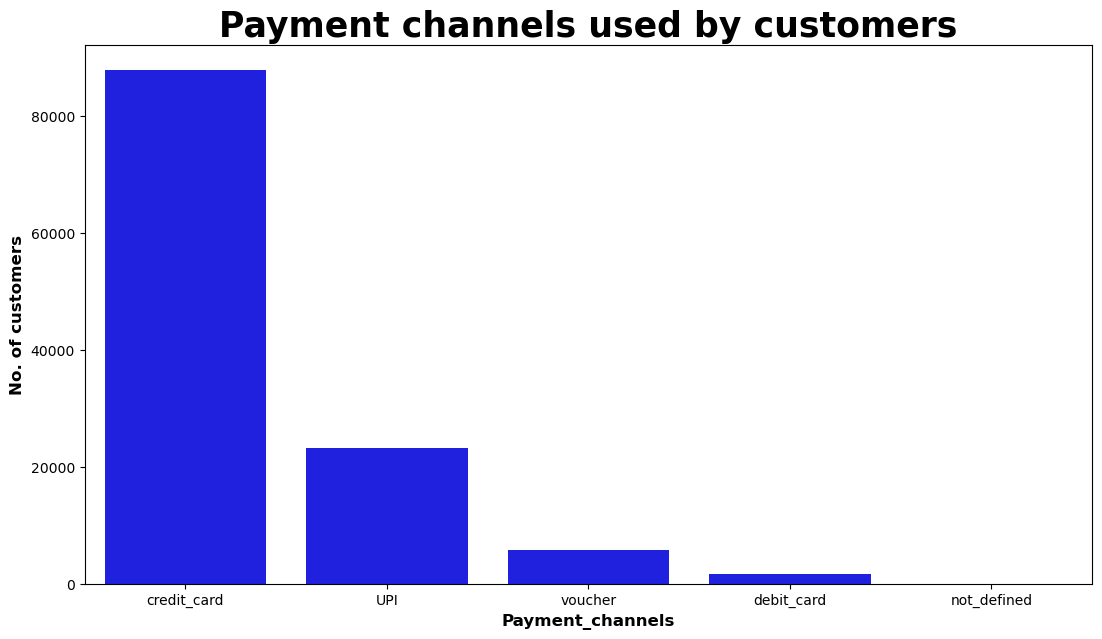

In [79]:
plt.figure(figsize=(13,7))
fig=sns.barplot(data=paying, x= 'index', y='payment_type', color='blue')
plt.xlabel("Payment_channels", fontsize=12, fontweight= 'bold')
plt.ylabel("No. of customers", fontsize=12, fontweight= 'bold')
plt.title('Payment channels used by customers', fontsize=25, fontweight='bold')
plt.show()

* From the above graph, we can conclude that the payment channel mostly used by most customers is CREDIT CARD.

#### 5. Customer satisfaction towards category & product

##### a. Which categories (top 10) are maximum rated & minimum rated?

In [80]:
### MAXIMUM RATED PRODUCT CATEGORIES
maxr=data.groupby(data.product_category_name).review_score.mean().sort_values(ascending=False).reset_index().head(10)
maxr

,product_category_name,review_score
0,Cds_Dvds_Musicals,4.642857
1,Fashion_Childrens_Clothes,4.500000
2,Books_General_Interest,4.431858
3,Books_Imported,4.419355
4,Books_Technical,4.345588
5,Costruction_Tools_Tools,4.333333
6,Small_Appliances_Home_Oven_And_Coffee,4.320513
7,Food_Drink,4.307958
8,Luggage_Accessories,4.290799
9,Fashion_Sport,4.258065


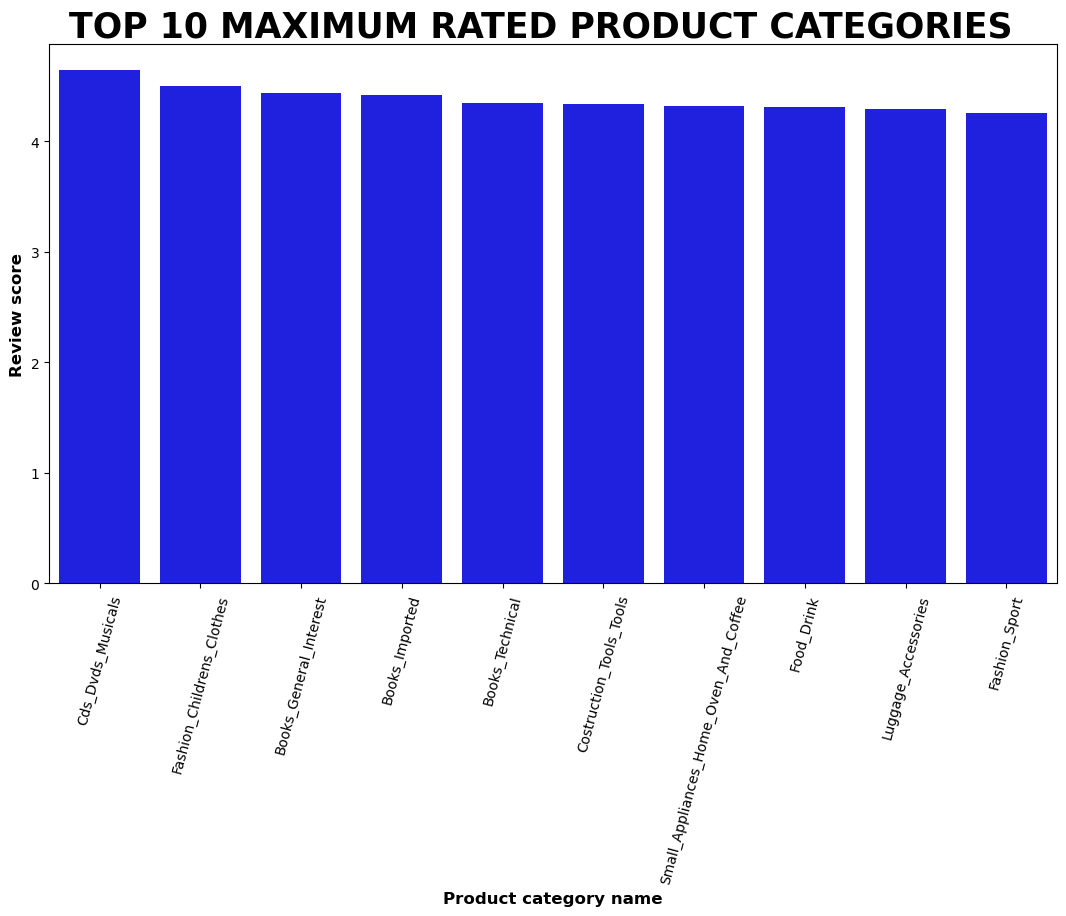

In [81]:
plt.figure(figsize=(13,7))
fig=sns.barplot(data=maxr, x= 'product_category_name', y='review_score', color='blue')
plt.xlabel("Product category name", fontsize=12, fontweight= 'bold')
plt.ylabel("Review score", fontsize=12, fontweight= 'bold')
plt.xticks(rotation=75)
plt.title('TOP 10 MAXIMUM RATED PRODUCT CATEGORIES  ', fontsize=25, fontweight='bold')
plt.show()

In [82]:
### MINIMUM RATED PRODUCT CATEGORIES
minr=data.groupby('product_category_name').review_score.mean().sort_values(ascending=True).reset_index().head(10)
minr

,product_category_name,review_score
0,Security_And_Services,2.500000
1,Diapers_And_Hygiene,3.256410
2,Home_Comfort_2,3.387097
3,Office_Furniture,3.508742
4,Fashion_Male_Clothing,3.528169
5,Fixed_Telephony,3.661765
6,Fashio_Female_Clothing,3.780000
7,Party_Supplies,3.795455
8,Furniture_Mattress_And_Upholstery,3.804878
9,Audio,3.817942


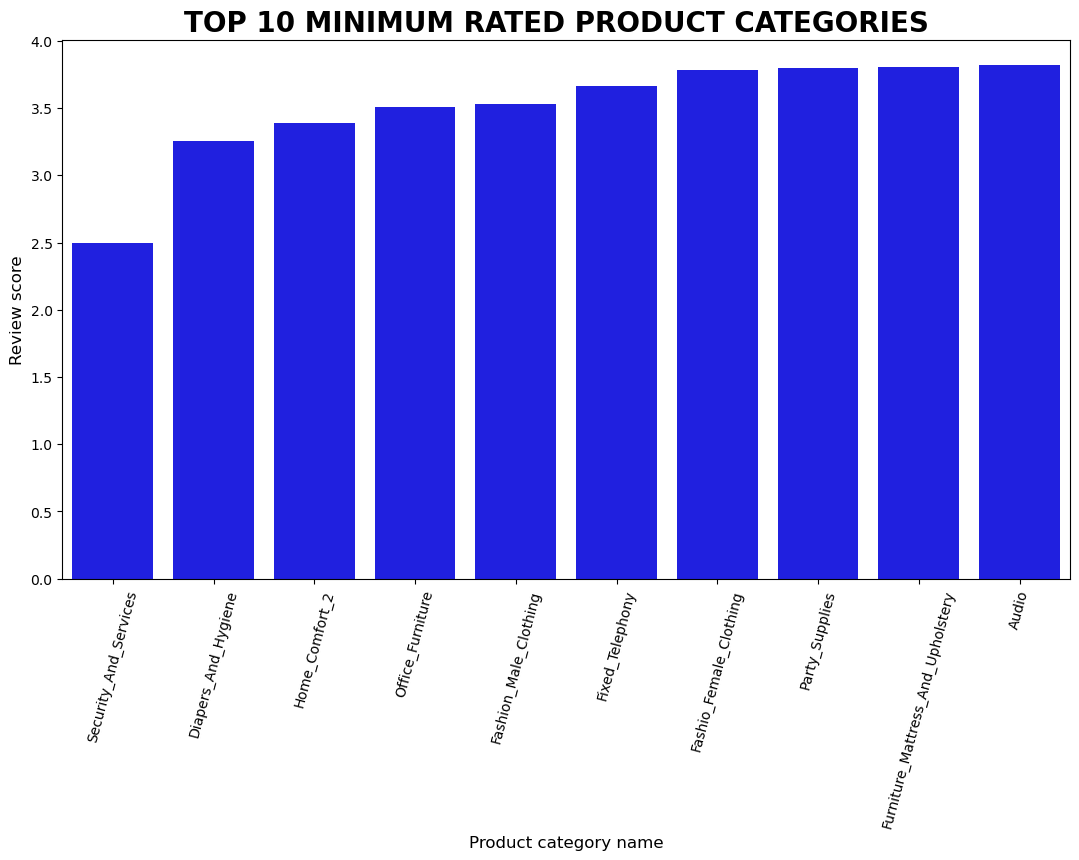

In [83]:
plt.figure(figsize=(13,7))
fig=sns.barplot(data=minr, x= 'product_category_name', y='review_score', color='blue')
plt.xlabel("Product category name", fontsize=12)
plt.ylabel("Review score", fontsize=12)
plt.xticks(rotation=75)
plt.title('TOP 10 MINIMUM RATED PRODUCT CATEGORIES  ', fontsize=20, fontweight='bold')
plt.show()

##### b. Which products (top10) are maximum rated & minimum rated?

In [84]:
### MAXIMUM RATED PRODUCTS
p_maxr=data.groupby(data.product_id).review_score.mean().sort_values(ascending=False).reset_index().head(10)
p_maxr

,product_id,review_score
0,00066f42aeeb9f3007548bb9d3f33c38,5.0
1,86743ff92eee3d16b7df59cddd583b8c,5.0
2,868ceb027ab706a4dee42e2220006b85,5.0
3,868969d3a93aeeab7bfcd4fc3d3d65de,5.0
4,868766ed2172644fdd977d6bd395a107,5.0
5,8684bd8f93b4f4038d07188a23811e93,5.0
6,867c96d2bb67aba6500a4c509cf76072,5.0
7,867b820367ec206b38a357f2c12454b7,5.0
8,867901d7e8488fb97f1fb538c09d476e,5.0
9,865bfa00c1dad8f4146d3c2765f051ca,5.0


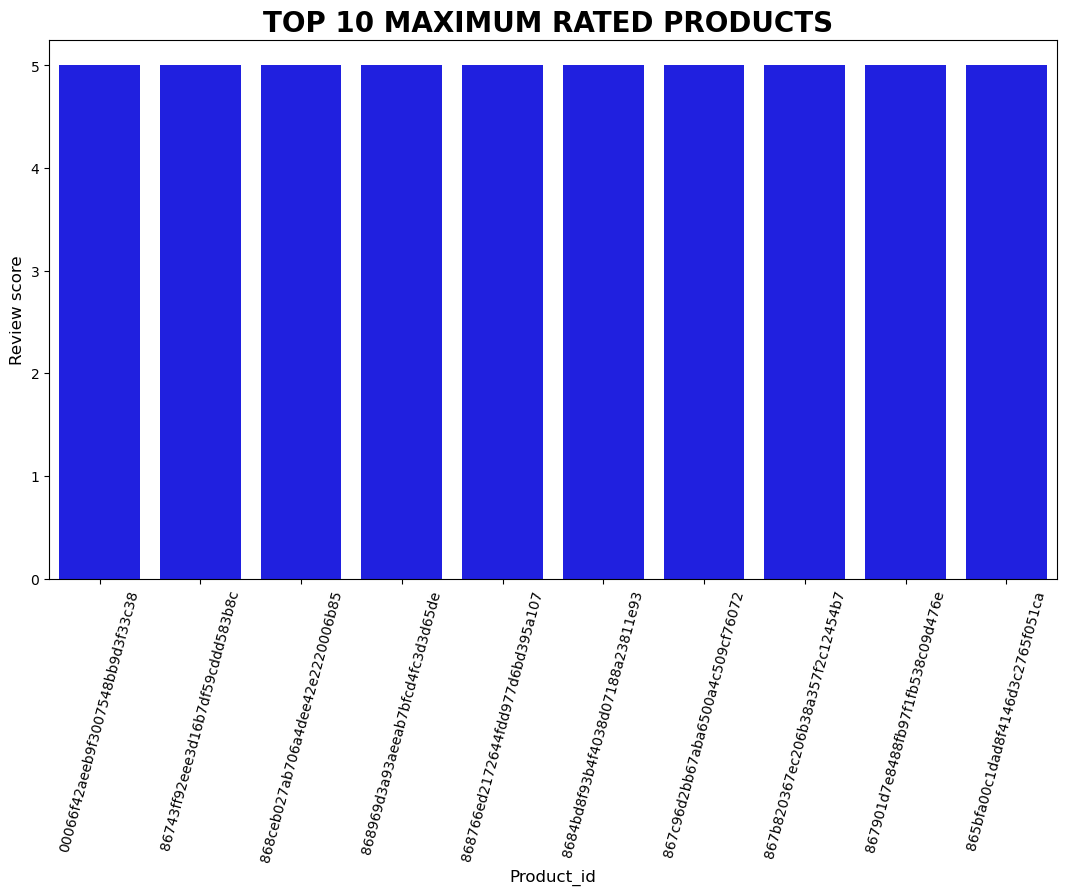

In [85]:
plt.figure(figsize=(13,7))
fig=sns.barplot(data=p_maxr, x= 'product_id', y='review_score', color='blue')
plt.xlabel('Product_id', fontsize=12)
plt.ylabel("Review score", fontsize=12)
plt.xticks(rotation=75)
plt.title('TOP 10 MAXIMUM RATED PRODUCTS ', fontsize=20, fontweight='bold')
plt.show()

In [86]:
p_minr=data.groupby(data.product_id).review_score.mean().sort_values(ascending=True).reset_index().head(10)
p_minr

,product_id,review_score
0,592cc6634d2c783d297effc0b828bc37,1.0
1,482c25dc8512547962854dfff5ac057b,1.0
2,e10c5041c0752194622a7a7016d8c9b5,1.0
3,47fafa6908e75ae62b8a36a9eb3b9234,1.0
4,47d85e3e35a3e29f93fdc12b295d520c,1.0
5,47d6209a0b169cc800b0a45a9127d2f2,1.0
6,47cad419b0ad5dc9d2305bf795c3c16f,1.0
7,47b49b876c60eafde72f0e1c602f386d,1.0
8,47b0f8596ee6dafbb4438cac16fa6275,1.0
9,47ac4dcdb04867daeaad647d224389e4,1.0


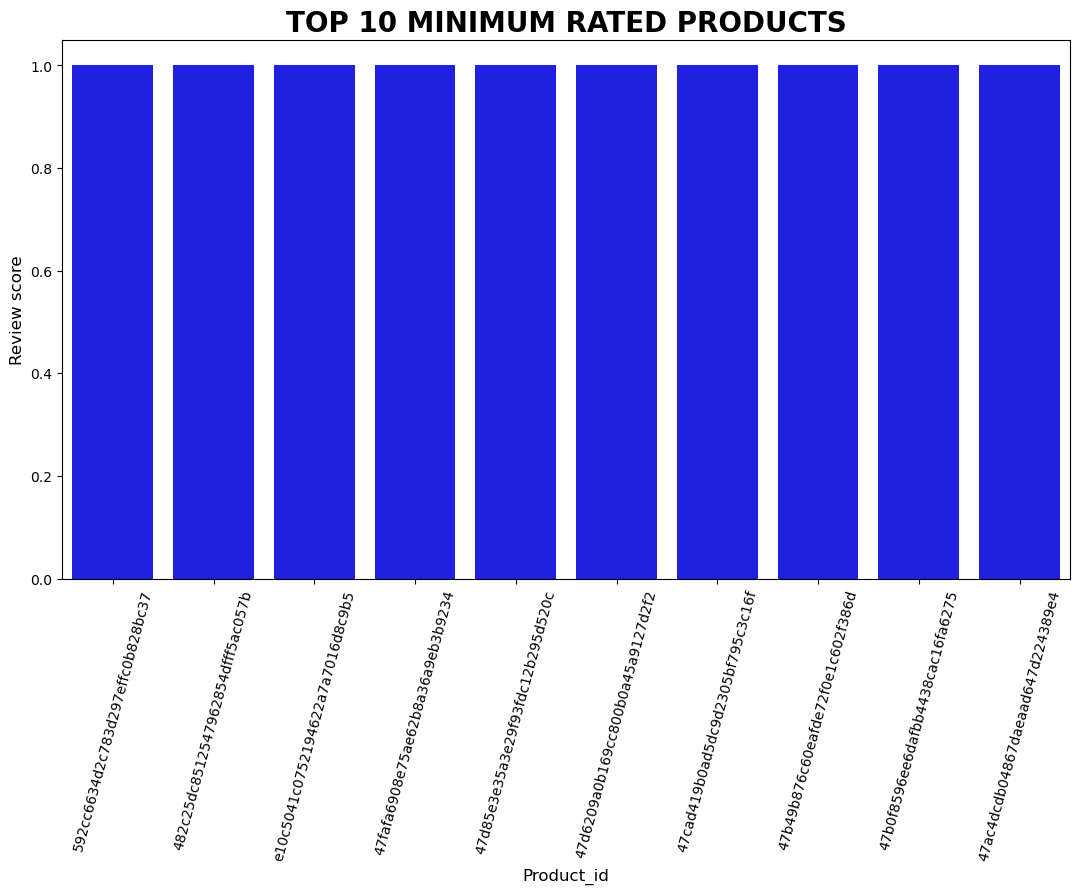

In [87]:
plt.figure(figsize=(13,7))
fig=sns.barplot(data=p_minr, x= 'product_id', y='review_score', color='blue')
plt.xlabel('Product_id', fontsize=12)
plt.ylabel("Review score", fontsize=12)
plt.xticks(rotation=75)
plt.title('TOP 10 MINIMUM RATED PRODUCTS', fontsize=20, fontweight='bold')
plt.show()

##### c. Average rating by location, seller, product, category, month etc.

In [88]:
#AVERAGE RATING BY SELLER
avg_s=data.groupby(data.seller_id).review_score.mean().sort_values(ascending=False).reset_index().head(10)
avg_s

,seller_id,review_score
0,c18309219e789960add0b2255ca4b091,5.0
1,9c1c0c36cd23c20897e473901a8fb149,5.0
2,544863df86ed3b78a04e0820d41430ee,5.0
3,247587846358bb1d2e4c6522020b36fe,5.0
4,9d69ba0a7a626a64dc5db08e529559cf,5.0
5,53b0300ca793f9834cd69c0678d35ee8,5.0
6,24c1de8d9551c0b4fbc53317d53efda8,5.0
7,53336f97ddbe53e2a617d07b17447b95,5.0
8,9dd459b29a14bf89d47183cf2cd0e4c7,5.0
9,258447aad3f7b01e2643c89f64dc5647,5.0


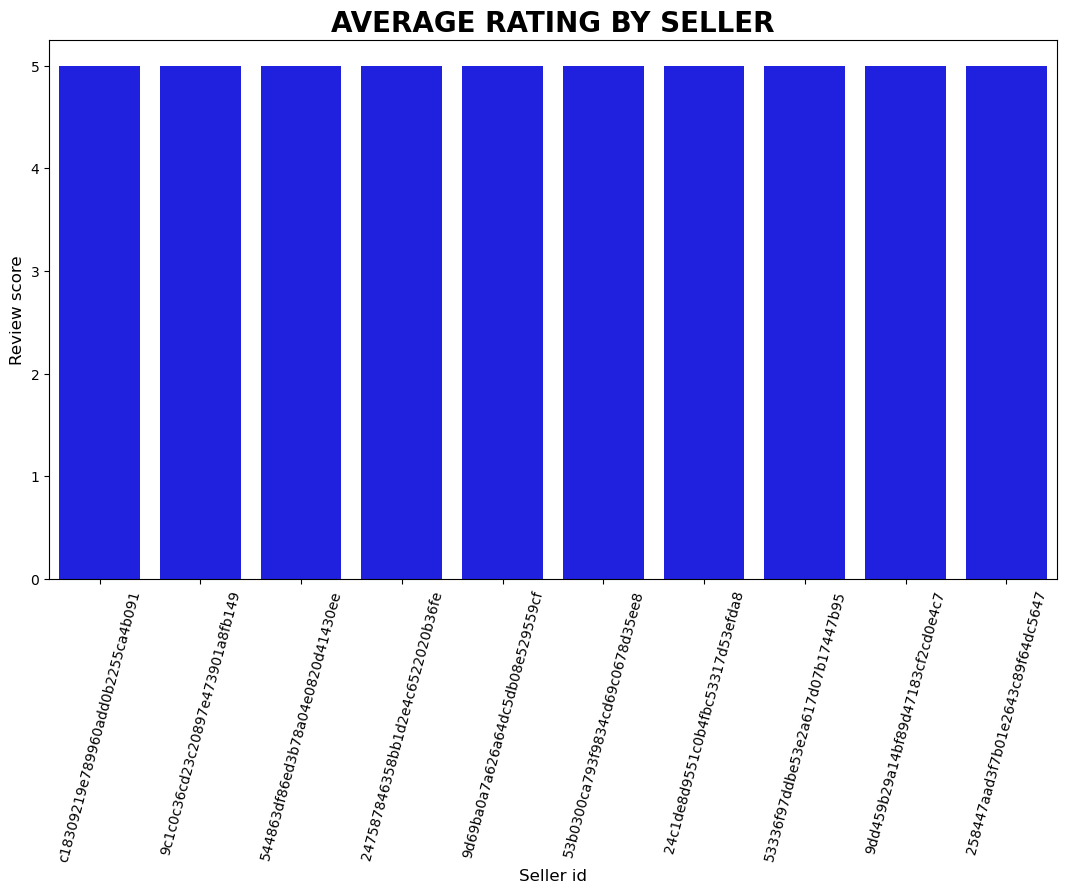

In [89]:
plt.figure(figsize=(13,7))
fig=sns.barplot(data=avg_s, x= 'seller_id', y='review_score', color='blue')
plt.xlabel('Seller id', fontsize=12)
plt.ylabel("Review score", fontsize=12)
plt.xticks(rotation=75)
plt.title('AVERAGE RATING BY SELLER', fontsize=20, fontweight='bold')
plt.show()

In [90]:
#AVERAGE LOCATION WISE REVIEW SCORE
avg_l=data.groupby(data.customer_state).review_score.mean().reset_index()
avg_l

,customer_state,review_score
0,Andhra Pradesh,3.979325
1,Arunachal Pradesh,4.008289
2,Chhattisgarh,4.015845
3,Delhi,4.018500
4,Goa,4.800000
5,Gujarat,4.023946
6,Haryana,4.085757
7,Himachal Pradesh,3.974713
8,Jammu & Kashmir,3.998907
9,Karnataka,3.996059


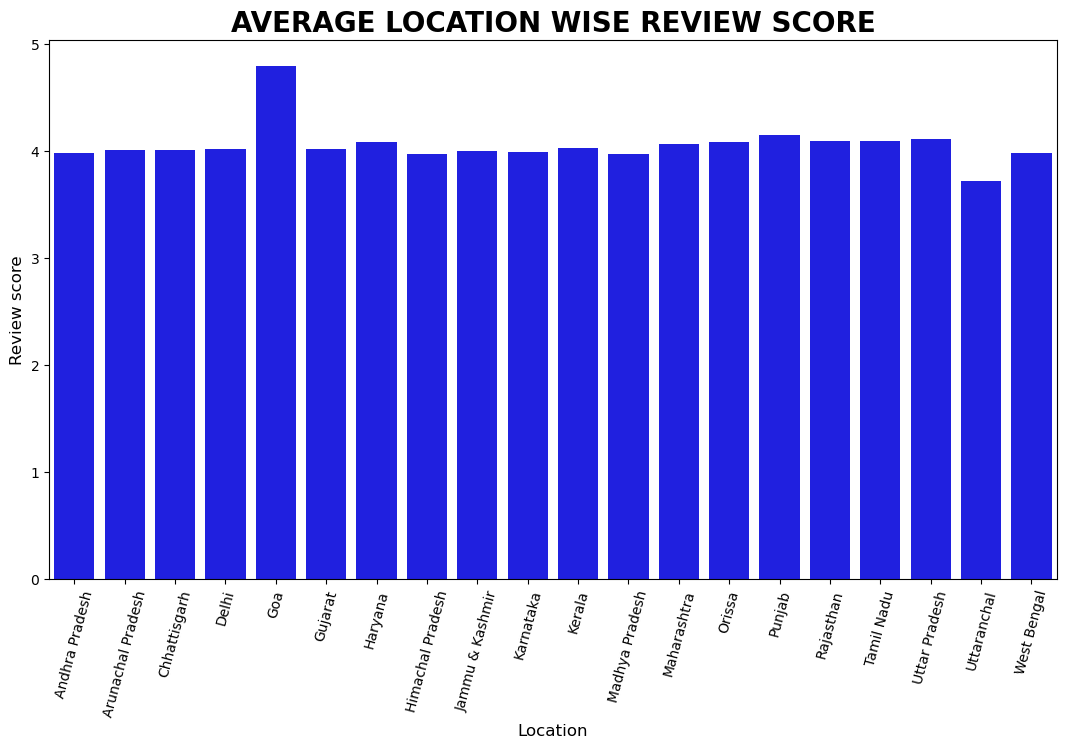

In [91]:
plt.figure(figsize=(13,7))
fig=sns.barplot(data=avg_l, x= 'customer_state', y='review_score', color='blue')
plt.xlabel('Location', fontsize=12 )
plt.ylabel("Review score", fontsize=12 )
plt.xticks(rotation=75)
plt.title('AVERAGE LOCATION WISE REVIEW SCORE', fontsize=20, fontweight='bold')
plt.show()

In [92]:
#AVERAGE MONTH WISE REVIEW SCORE
month_review=data.groupby(data.month_of_year).review_score.mean().reset_index()
month_review

,month_of_year,review_score
0,201609,1.000000
1,201610,3.491272
2,201612,5.000000
3,201701,4.063107
4,201702,3.980495
5,201703,4.018909
6,201704,3.956659
7,201705,4.096231
8,201706,4.101408
9,201707,4.081608


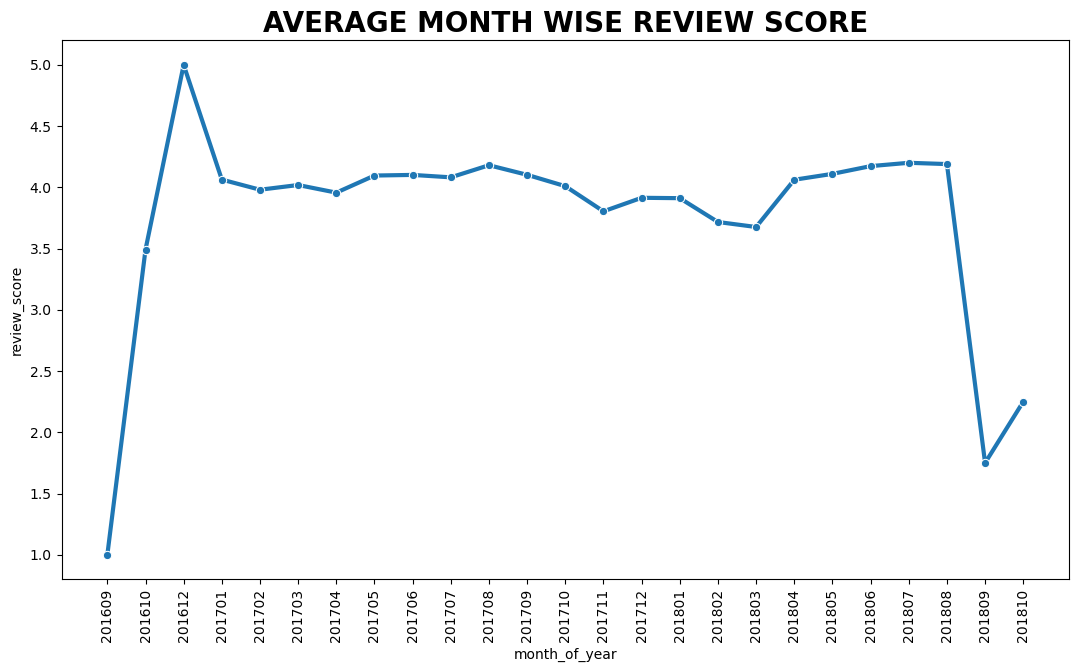

In [93]:
plt.figure(figsize=(13,7))
sns.lineplot(data= month_review, x='month_of_year', y='review_score',  marker="o",linewidth=3)
plt.xticks(rotation=90)
plt.title('AVERAGE MONTH WISE REVIEW SCORE', fontsize=20, fontweight='bold')
plt.show()